In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams["figure.dpi"] = 300
np.set_printoptions(precision=3, suppress=True)
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

In [186]:
url = "ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_weekly_mlo.txt"
names = ["year", "month", "day", "year_decimal", "co2", "days", "1 yr ago", "10 yr ago", "since 1800"]
maunaloa = pd.read_csv(url, skiprows=49, header=None, delim_whitespace=True,
                       names=names, na_values=[-999.99])

In [187]:
maunaloa.head()

year  month  day  year_decimal     co2  days  1 yr ago  10 yr ago  \
0  1974      5   19     1974.3795  333.34     6       NaN        NaN   
1  1974      5   26     1974.3986  332.95     6       NaN        NaN   
2  1974      6    2     1974.4178  332.32     5       NaN        NaN   
3  1974      6    9     1974.4370  332.18     7       NaN        NaN   
4  1974      6   16     1974.4562  332.37     7       NaN        NaN   

   since 1800  
0       50.36  
1       50.06  
2       49.57  
3       49.63  
4       50.07

In [188]:
maunaloa = pd.read_csv(url, skiprows=49, header=None, delim_whitespace=True,
                       names=names, parse_dates=[[0, 1, 2]], na_values=[-999.99])

In [189]:
maunaloa.head()

year_month_day  year_decimal     co2  days  1 yr ago  10 yr ago  since 1800
0     1974-05-19     1974.3795  333.34     6       NaN        NaN       50.36
1     1974-05-26     1974.3986  332.95     6       NaN        NaN       50.06
2     1974-06-02     1974.4178  332.32     5       NaN        NaN       49.57
3     1974-06-09     1974.4370  332.18     7       NaN        NaN       49.63
4     1974-06-16     1974.4562  332.37     7       NaN        NaN       50.07

In [184]:
maunaloa.year_month_day.head()

0   1974-05-19
1   1974-05-26
2   1974-06-02
3   1974-06-09
4   1974-06-16
Name: year_month_day, dtype: datetime64[ns]

In [192]:
maunaloa = pd.read_csv(url, skiprows=49, header=None, delim_whitespace=True,
                       names=names, parse_dates=[[0, 1, 2]], na_values=[-999.99],
                       index_col="year_month_day")

In [193]:
maunaloa.head()

year_decimal     co2  days  1 yr ago  10 yr ago  since 1800
year_month_day                                                             
1974-05-19         1974.3795  333.34     6       NaN        NaN       50.36
1974-05-26         1974.3986  332.95     6       NaN        NaN       50.06
1974-06-02         1974.4178  332.32     5       NaN        NaN       49.57
1974-06-09         1974.4370  332.18     7       NaN        NaN       49.63
1974-06-16         1974.4562  332.37     7       NaN        NaN       50.07

In [195]:
maunaloa.co2.head()

year_month_day
1974-05-19    333.34
1974-05-26    332.95
1974-06-02    332.32
1974-06-09    332.18
1974-06-16    332.37
Name: co2, dtype: float64

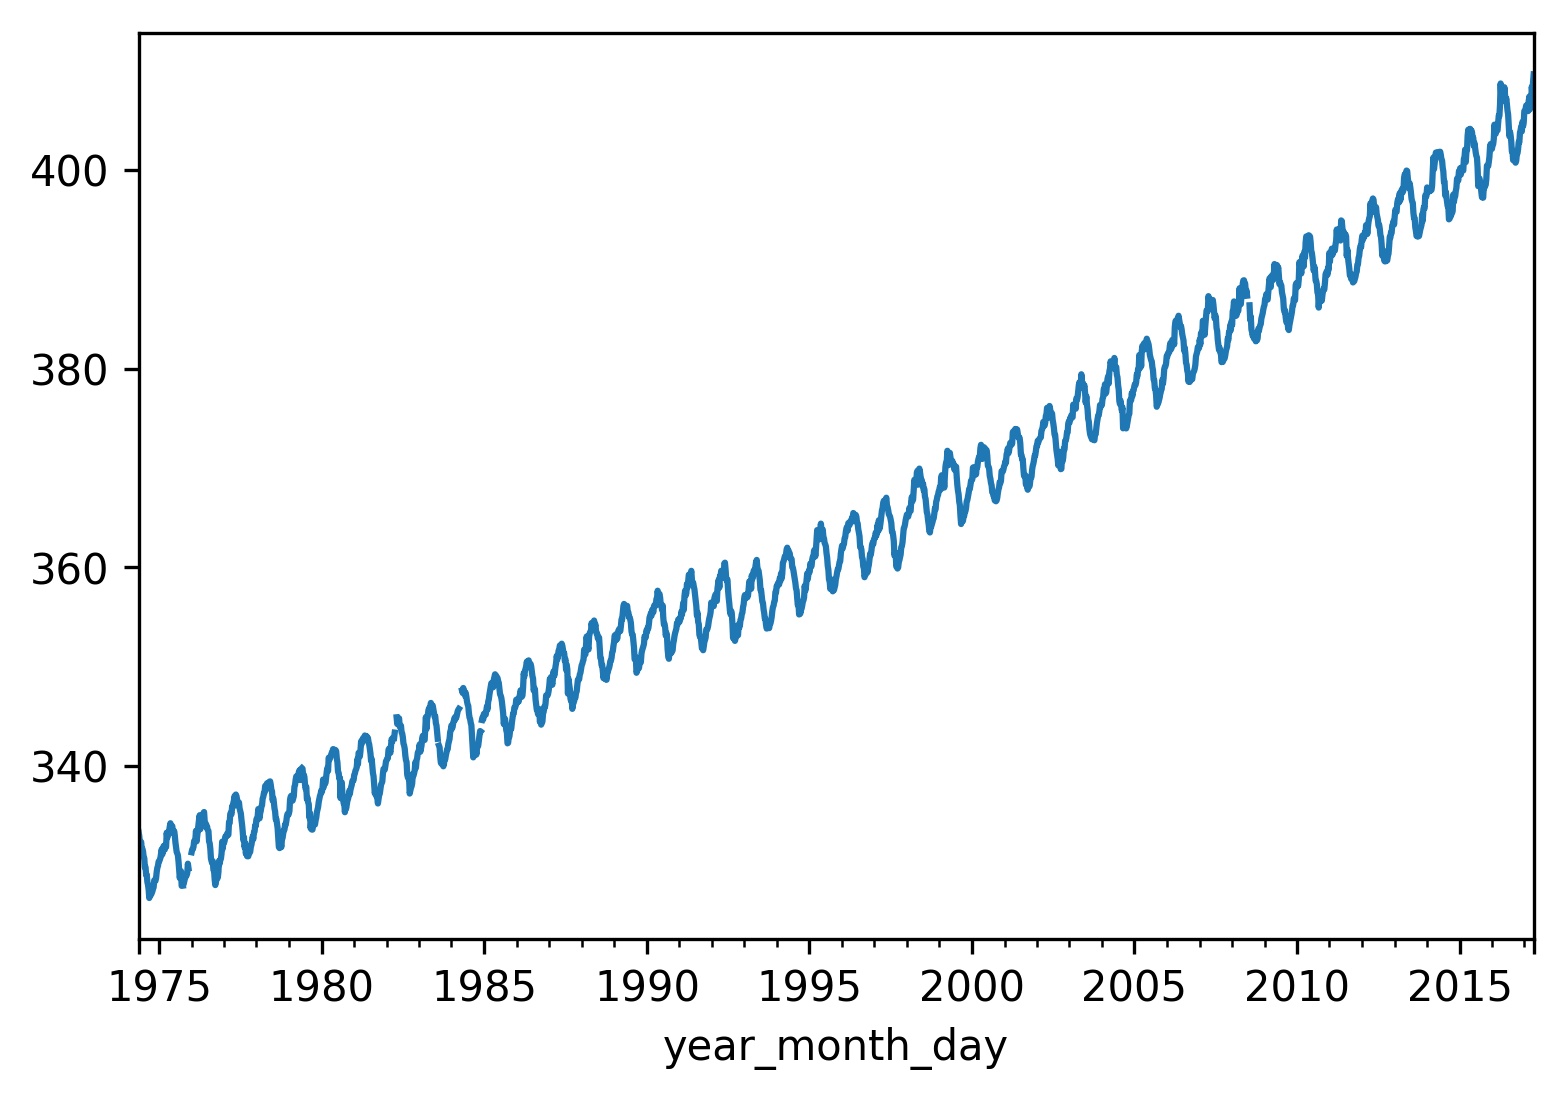

In [196]:
maunaloa.co2.plot()

In [198]:
maunaloa.co2.isnull().sum()

20

In [202]:
maunaloa.fillna(method="ffill", inplace=True)  # or bfill
maunaloa.co2.isnull().sum()

0

In [209]:
# resampling is lazy
resampled_co2 = maunaloa.co2.resample("MS")
print(resampled_co2)
resampled_co2.mean().head()

DatetimeIndexResampler [freq=<MonthBegin>, axis=0, closed=left, label=left, convention=start, base=0]


year_month_day
1974-05-01    333.1450
1974-06-01    332.0280
1974-07-01    330.7125
1974-08-01    329.0725
1974-09-01    327.3240
Freq: MS, Name: co2, dtype: float64

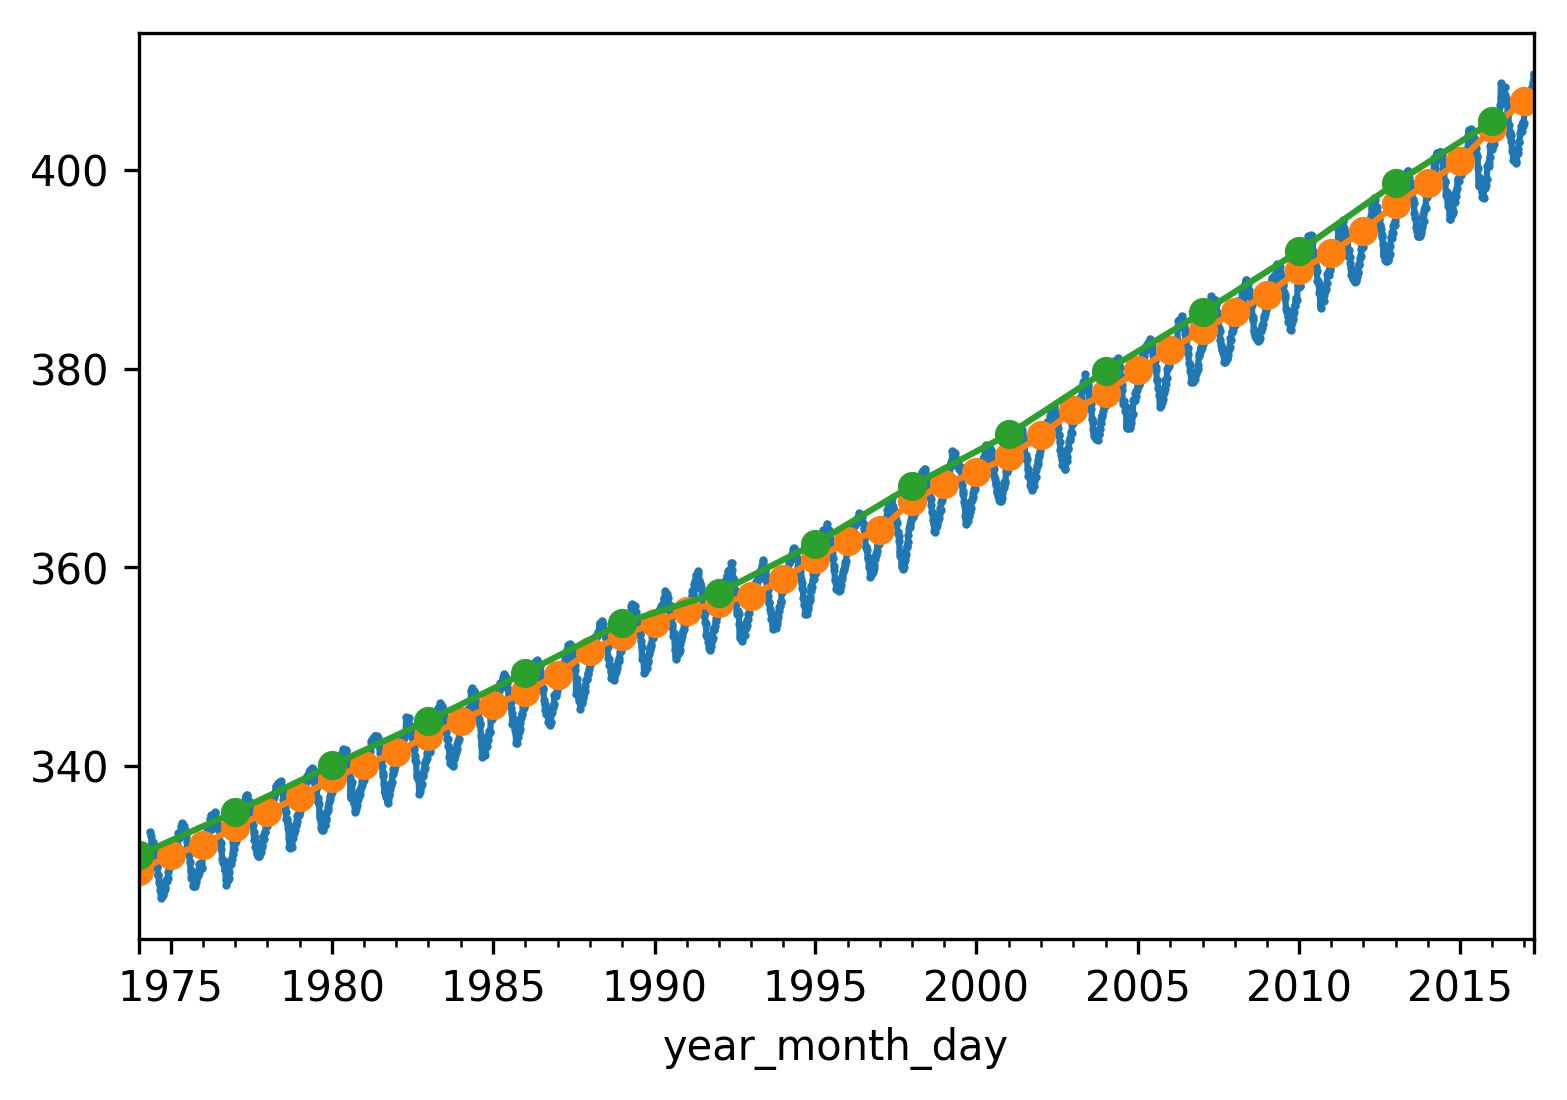

In [220]:
maunaloa.co2.resample("W").mean().plot(marker="o", markersize=1)
maunaloa.co2.resample("AS").mean().plot(marker="o")
maunaloa.co2.resample("3AS").mean().plot(marker="o")

# Load the other format of this time series for no reason whatsoever

In [3]:
columns = ["year", "month", "decimal date", "average", "interpolated", "trend", "?"]
co2 = pd.read_csv("ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt",
                  delim_whitespace=True, skiprows=72, names=columns, parse_dates=[[0, 1]])


In [4]:
co2.head()

year_month  decimal date  average  interpolated   trend  ?
0 1958-03-01      1958.208   315.71        315.71  314.62 -1
1 1958-04-01      1958.292   317.45        317.45  315.29 -1
2 1958-05-01      1958.375   317.50        317.50  314.71 -1
3 1958-06-01      1958.458   -99.99        317.10  314.85 -1
4 1958-07-01      1958.542   315.86        315.86  314.98 -1

In [5]:
co2.set_index("year_month", inplace=True)

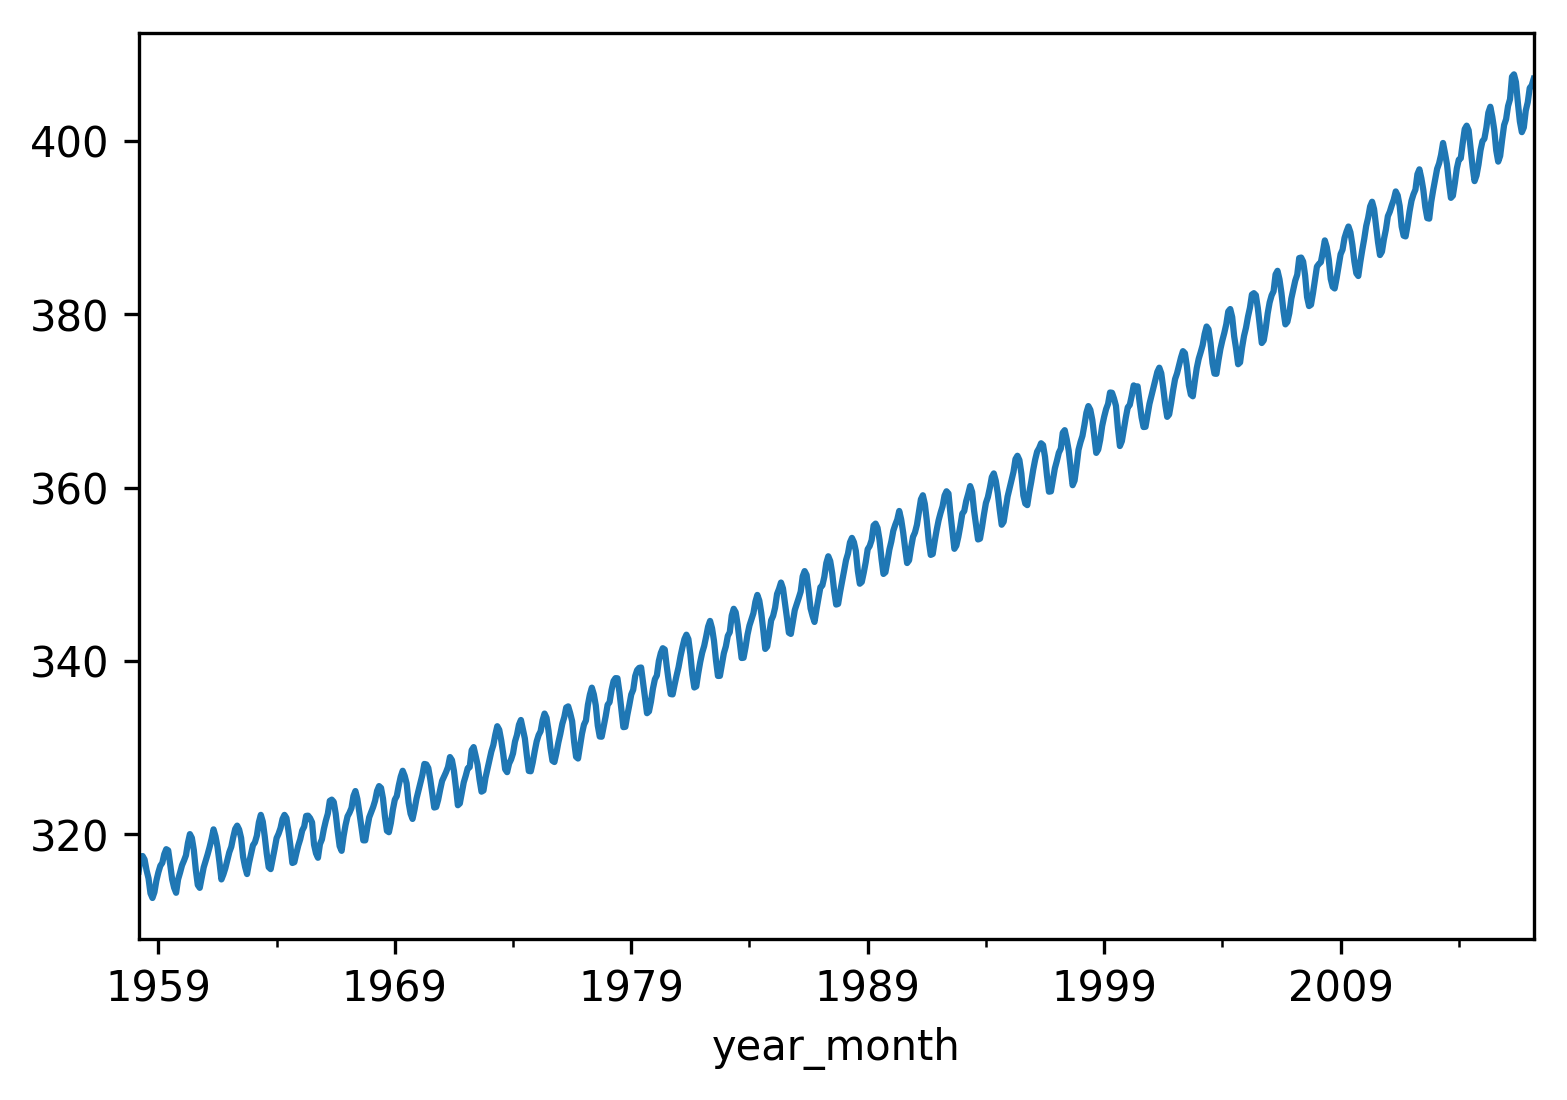

In [6]:
co2.interpolated.plot()

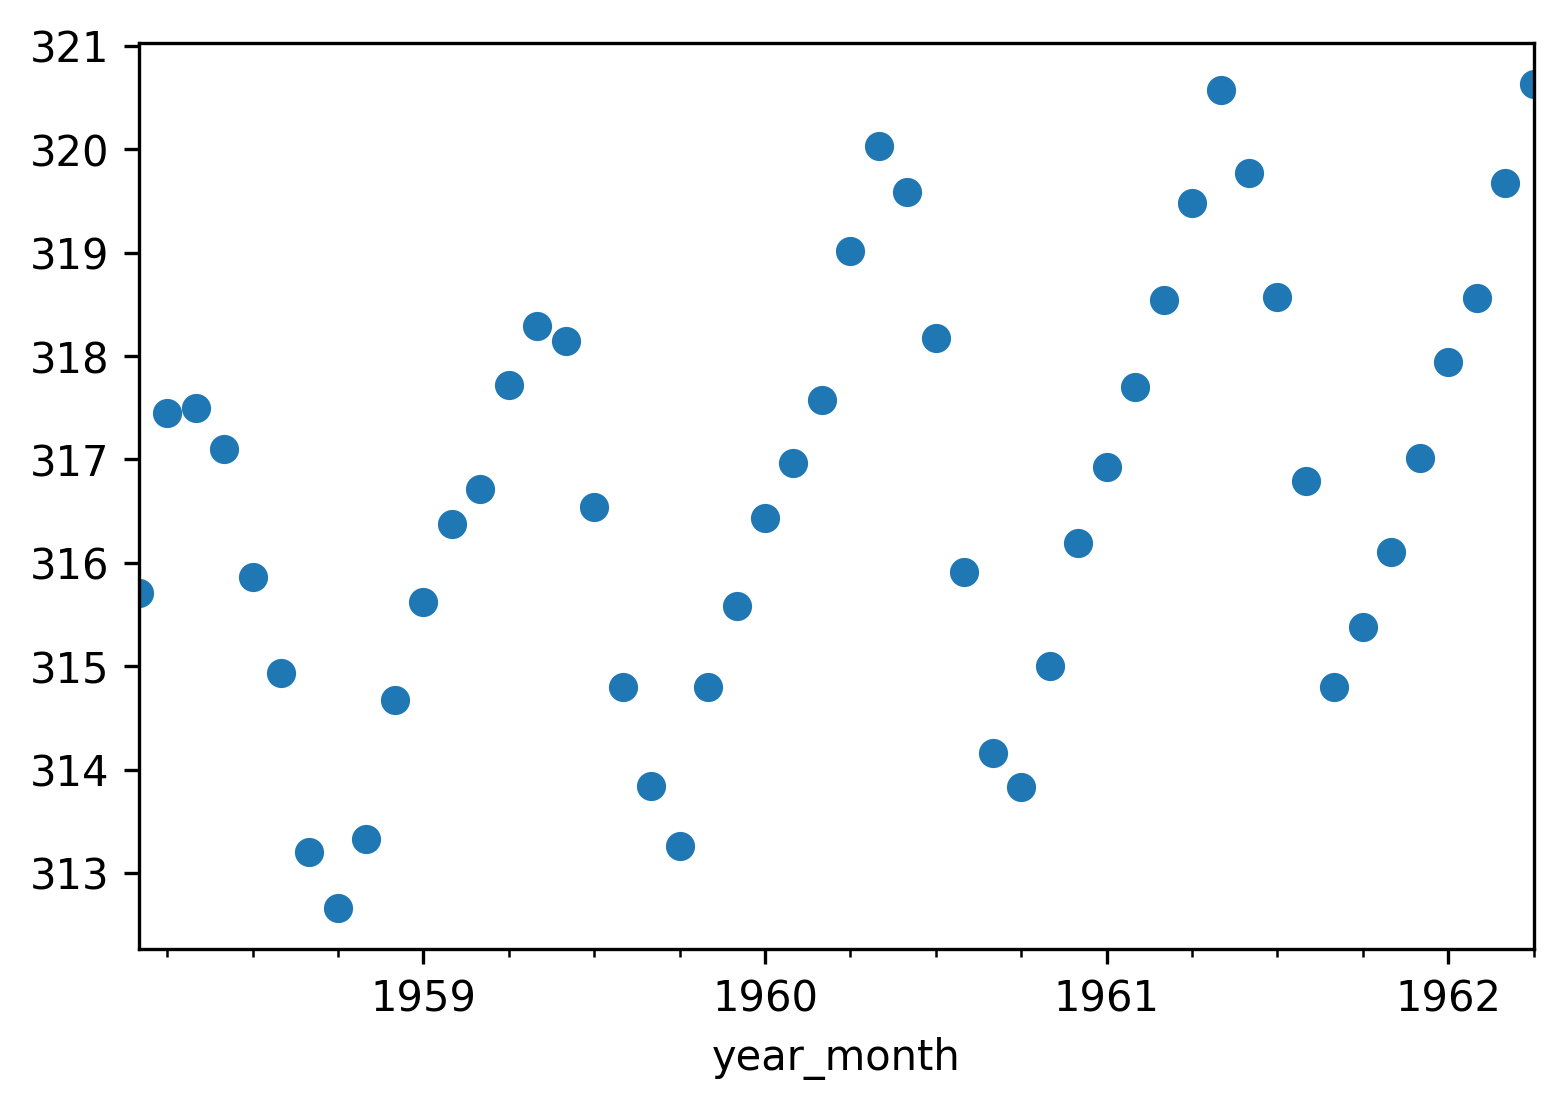

In [96]:
co2.interpolated[:50].plot(marker="o", linestyle="none")

# uneven time series from amazon access requests

In [99]:
amzn_access = pd.read_csv("http://nrvis.com/data/mldata/amzn-anon-access-samples-history-2.csv",
                          parse_dates=["REQUEST_DATE", "AUTHORIZATION_DATE"])

In [101]:
amzn_access.head()

ACTION  TARGET_NAME  LOGIN        REQUEST_DATE  AUTHORIZATION_DATE
0  remove_access        11044  45813  2005-03-2510:53:40  2005-03-2510:53:41
1     add_access        11044  65766  2005-03-2510:55:46  2005-03-2510:55:47
2     add_access         9521  72531  2005-04-0413:51:33  2005-04-0610:21:48
3     add_access         9521  72531  2005-04-0413:52:01  2005-04-0610:21:48
4     add_access         9521  72531  2005-04-0413:52:11  2005-04-0610:21:49

In [110]:
colors = plt.cm.Vega10((amzn_access.ACTION == "add_access").astype(np.int))

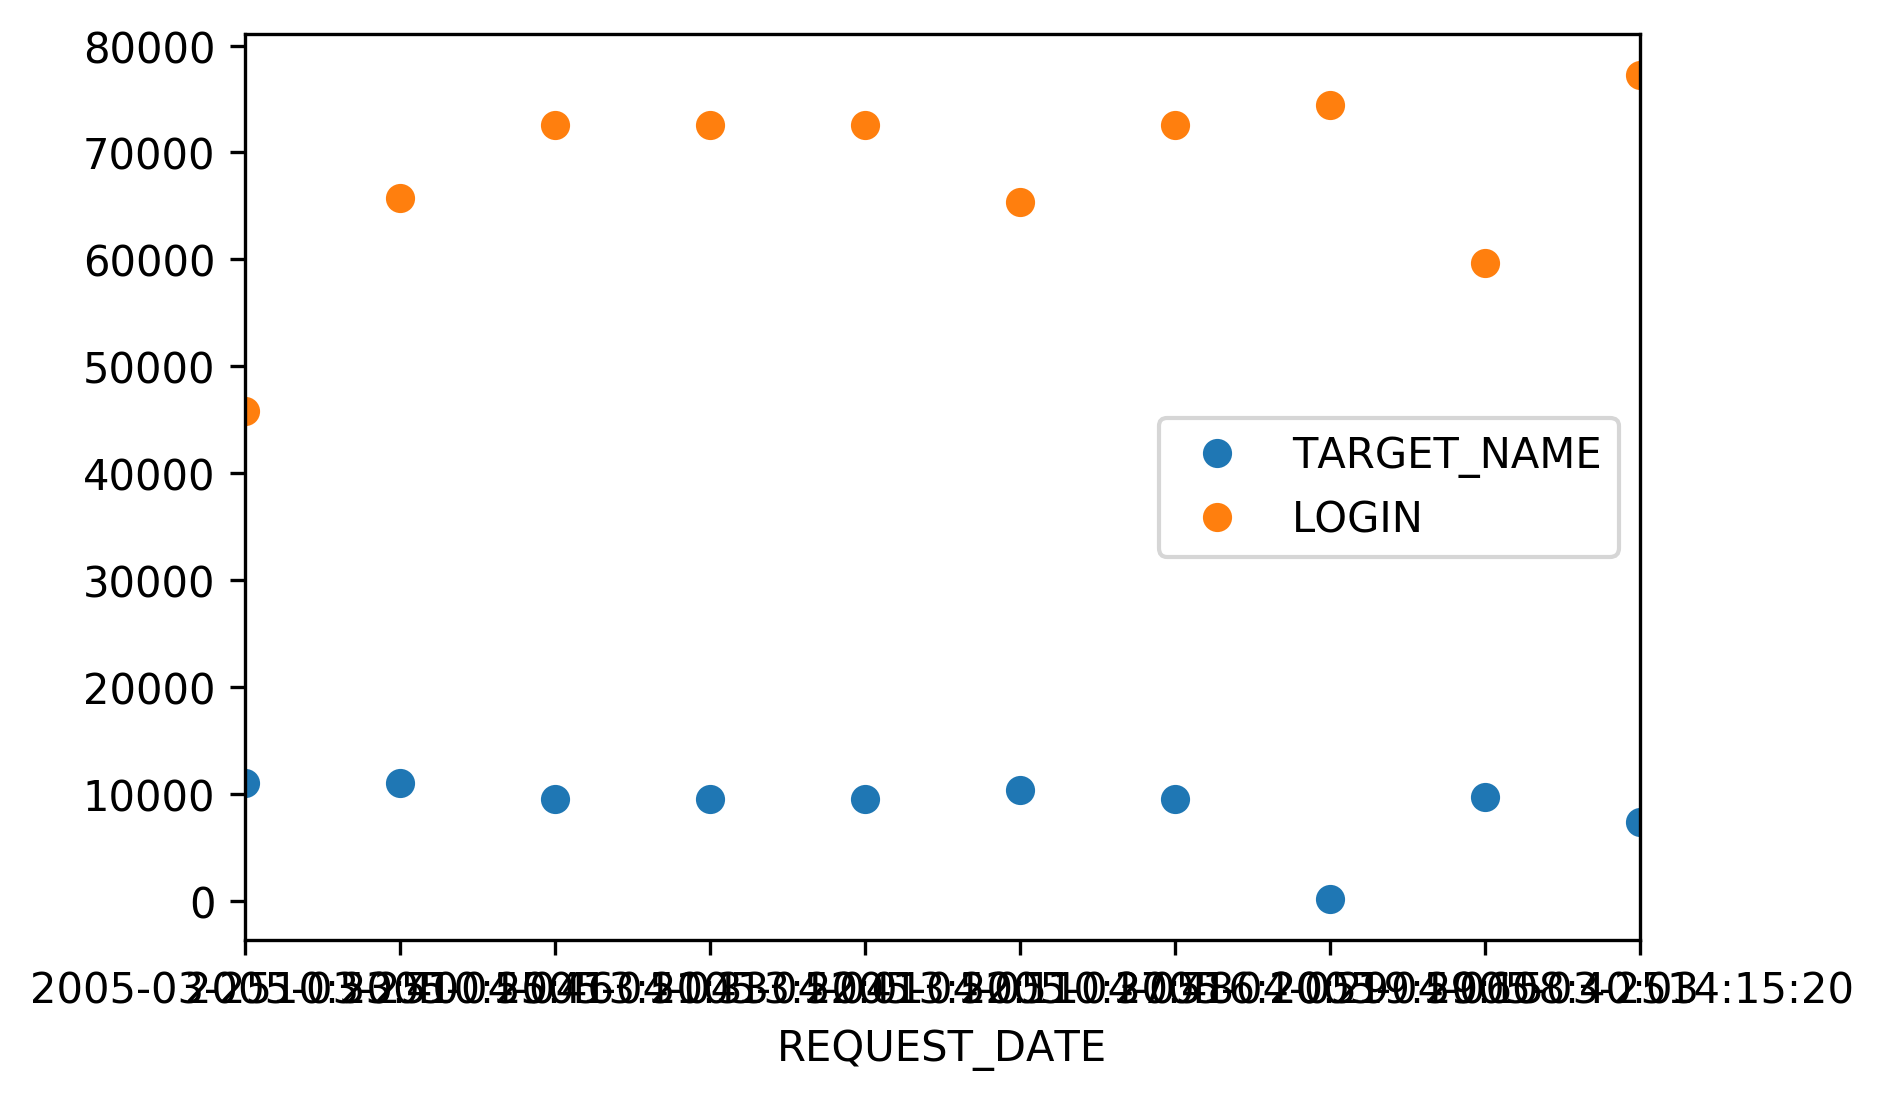

In [115]:
amzn_access[:10].plot("REQUEST_DATE", color=colors[:10], marker="o", linestyle="none")

In [162]:
volcano = pd.read_csv("https://www.ngdc.noaa.gov/nndc/struts/results?type_0=Exact&query_0=$HAZ_EVENT_ID&t=102557&s=50&d=54&dfn=volerup.txt",
                      delimiter="\t")

In [166]:
volcano[-10:]

Year  Month   Day  TSU   EQ                    Name  \
787  2015    2.0  20.0  NaN  NaN                Sinabung   
788  2015    4.0  22.0  NaN  NaN                 Calbuco   
789  2015    5.0   7.0  NaN  NaN  Karangetang [Api Siau]   
790  2015    7.0  31.0  NaN  NaN                   Manam   
791  2015   10.0  16.0  NaN  NaN                Sinabung   
792  2016    5.0   9.0  NaN  NaN                Sinabung   
793  2016    5.0  21.0  NaN  NaN                Sinabung   
794  2016    6.0   9.0  NaN  NaN             Yellowstone   
795  2016    9.0  27.0  NaN  NaN                 Rinjani   
796  2016   10.0   8.0  NaN  NaN                     Aso   

                 Location           Country  Latitude  Longitude  \
787               Sumatra         Indonesia     3.170     98.392   
788               Chile-S             Chile   -41.326    -72.614   
789  Sangihe Is-Indonesia         Indonesia     2.780    125.480   
790      New Guinea-NE of  Papua New Guinea    -4.100    145.061   
791               Sumatra         Indonesia     3.170     98.392   
792               Sumatra         Indonesia     3.170     98.392   
793               Sumatra         Indonesia     3.170     98.392   
794            US-Wyoming     United States    44.430   -110.670   
795       Lesser Sunda Is         Indonesia    -8.420    116.470   
796          Kyushu-Japan             Japan    32.880    131.100   

                    ...                  TOTAL_DEATHS  \
787                 ...                           NaN   
788                 ...                           NaN   
789                 ...                           NaN   
790                 ...                           NaN   
791                 ...                           1.0   
792                 ...                           1.0   
793                 ...                           7.0   
794                 ...                           1.0   
795                 ...                           NaN   
796                 ...                           NaN   

    TOTAL_DEATHS_DESCRIPTION TOTAL_MISSING TOTAL_MISSING_DESCRIPTION  \
787                      NaN           NaN                       NaN   
788                      NaN           NaN                       NaN   
789                      NaN           NaN                       NaN   
790                      NaN           NaN                       NaN   
791                      1.0           NaN                       NaN   
792                      1.0           NaN                       NaN   
793                      1.0           NaN                       NaN   
794                      1.0           NaN                       NaN   
795                      NaN          44.0                       1.0   
796                      NaN           NaN                       NaN   

     TOTAL_INJURIES TOTAL_INJURIES_DESCRIPTION  TOTAL_DAMAGE_MILLIONS_DOLLARS  \
787             NaN                        NaN                            NaN   
788             NaN                        NaN                            NaN   
789             NaN                        NaN                            NaN   
790             2.0                        1.0                            NaN   
791             NaN                        NaN                            NaN   
792             4.0                        1.0                            NaN   
793             3.0                        1.0                          100.0   
794             NaN                        NaN                            NaN   
795             NaN                        NaN                            NaN   
796             NaN                        NaN                            NaN   

     TOTAL_DAMAGE_DESCRIPTION  TOTAL_HOUSES_DESTROYED  \
787                       1.0                     NaN   
788                       2.0                     NaN   
789                       1.0                     NaN   
790                       1.0                     NaN 

In [167]:
volcano = pd.read_csv("https://www.ngdc.noaa.gov/nndc/struts/results?type_0=Exact&query_0=$HAZ_EVENT_ID&t=102557&s=50&d=54&dfn=volerup.txt",
                      delimiter="\t", parse_dates=[["Year", "Month", "Day"]])

In [168]:
volcano[-10:]

Year_Month_Day  TSU   EQ                    Name              Location  \
787      2015 2 20  NaN  NaN                Sinabung               Sumatra   
788      2015 4 22  NaN  NaN                 Calbuco               Chile-S   
789       2015 5 7  NaN  NaN  Karangetang [Api Siau]  Sangihe Is-Indonesia   
790      2015 7 31  NaN  NaN                   Manam      New Guinea-NE of   
791     2015 10 16  NaN  NaN                Sinabung               Sumatra   
792       2016 5 9  NaN  NaN                Sinabung               Sumatra   
793      2016 5 21  NaN  NaN                Sinabung               Sumatra   
794       2016 6 9  NaN  NaN             Yellowstone            US-Wyoming   
795      2016 9 27  NaN  NaN                 Rinjani       Lesser Sunda Is   
796      2016 10 8  NaN  NaN                     Aso          Kyushu-Japan   

              Country  Latitude  Longitude  Elevation           Type  \
787         Indonesia     3.170     98.392       2460  Stratovolcano   
788             Chile   -41.326    -72.614       2003  Stratovolcano   
789         Indonesia     2.780    125.480       1784  Stratovolcano   
790  Papua New Guinea    -4.100    145.061       1807  Stratovolcano   
791         Indonesia     3.170     98.392       2460  Stratovolcano   
792         Indonesia     3.170     98.392       2460  Stratovolcano   
793         Indonesia     3.170     98.392       2460  Stratovolcano   
794     United States    44.430   -110.670       2805        Caldera   
795         Indonesia    -8.420    116.470       3726  Stratovolcano   
796             Japan    32.880    131.100       1592        Caldera   

                    ...                 TOTAL_DEATHS TOTAL_DEATHS_DESCRIPTION  \
787                 ...                          NaN                      NaN   
788                 ...                          NaN                      NaN   
789                 ...                          NaN                      NaN   
790                 ...                          NaN                      NaN   
791                 ...                          1.0                      1.0   
792                 ...                          1.0                      1.0   
793                 ...                          7.0                      1.0   
794                 ...                          1.0                      1.0   
795                 ...                          NaN                      NaN   
796                 ...                          NaN                      NaN   

     TOTAL_MISSING TOTAL_MISSING_DESCRIPTION  TOTAL_INJURIES  \
787            NaN                       NaN             NaN   
788            NaN                       NaN             NaN   
789            NaN                       NaN             NaN   
790            NaN                       NaN             2.0   
791            NaN                       NaN             NaN   
792            NaN                       NaN             4.0   
793            NaN                       NaN             3.0   
794            NaN                       NaN             NaN   
795           44.0                       1.0             NaN   
796            NaN                       NaN             NaN   

     TOTAL_INJURIES_DESCRIPTION  TOTAL_DAMAGE_MILLIONS_DOLLARS  \
787                         NaN                            NaN   
788                         NaN                            NaN   
789                         NaN                            NaN   
790                         1.0                            NaN   
791                         NaN                            NaN   
792                         1.0                            NaN   
793                         1.0                          100.0   
794                         NaN                            NaN   
795                         NaN                            NaN   
796                         NaN                            NaN   

     TOTAL_DAMAGE_DESCRIPTIO

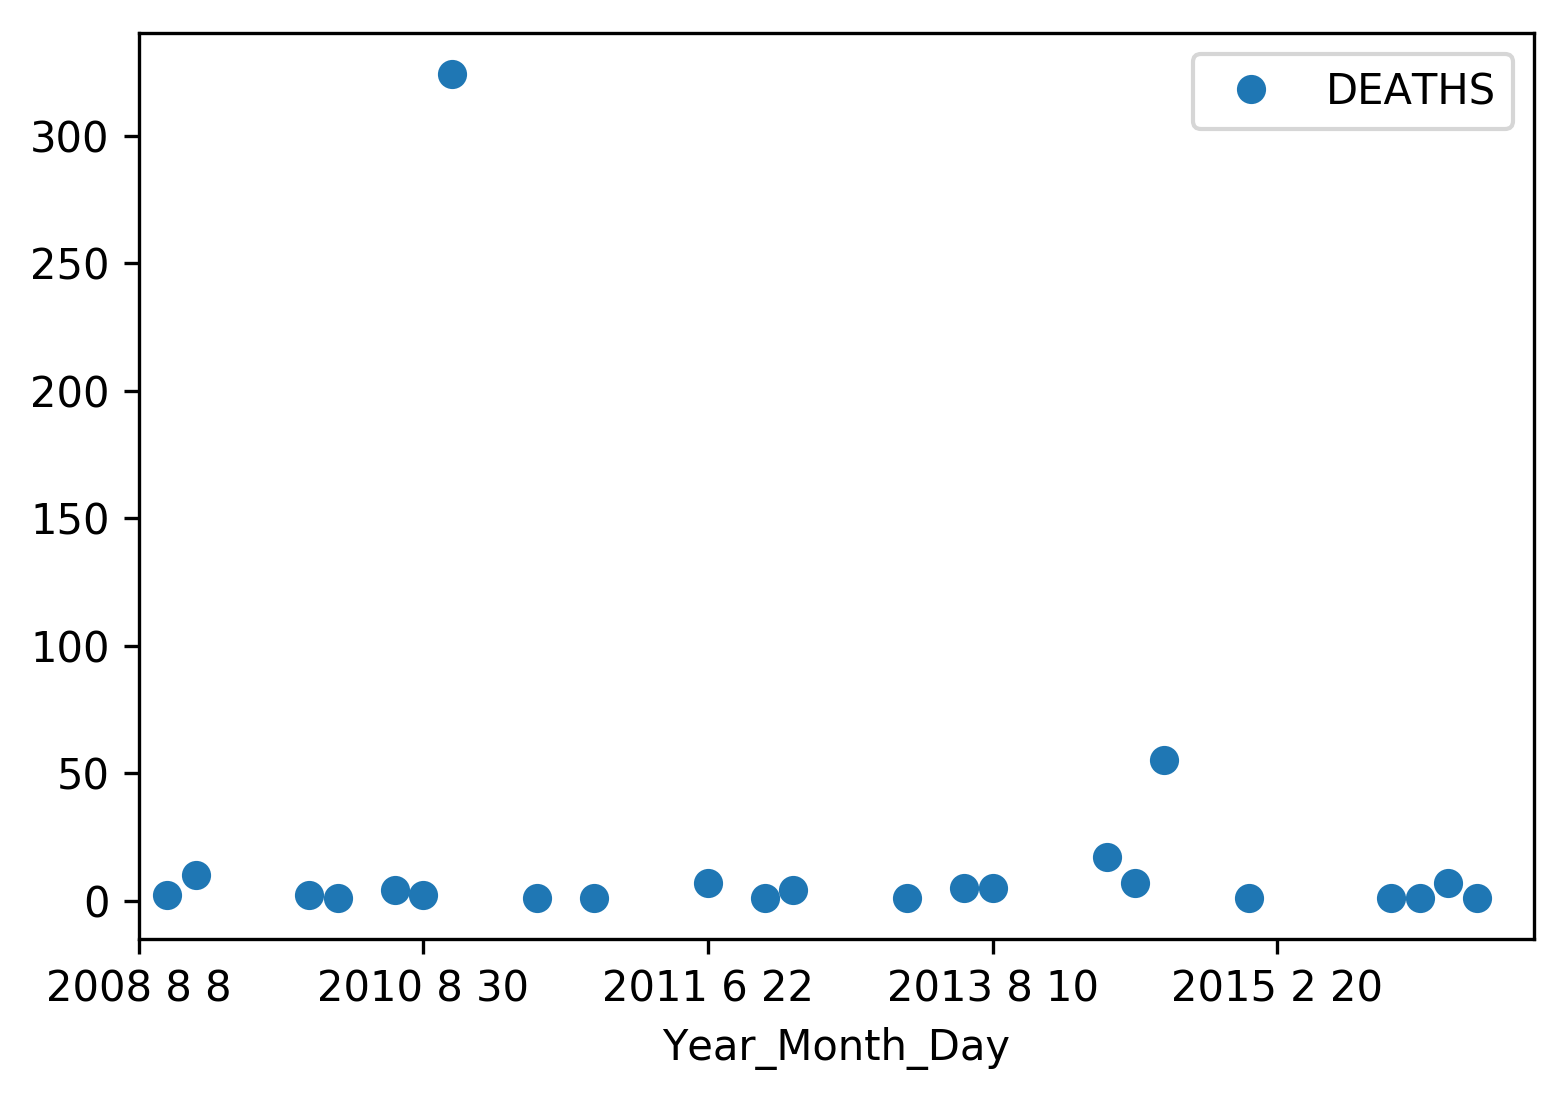

In [135]:
volcano[-50:].plot("Year_Month_Day", "DEATHS", marker="o", linestyle="none")

In [7]:
ppm = co2.interpolated

In [8]:
ppm.head()

year_month
1958-03-01    315.71
1958-04-01    317.45
1958-05-01    317.50
1958-06-01    317.10
1958-07-01    315.86
Name: interpolated, dtype: float64

In [9]:
ppm.autocorr()

0.99892081520225573

In [10]:
ppm.autocorr(lag=12)

0.99973333237787498

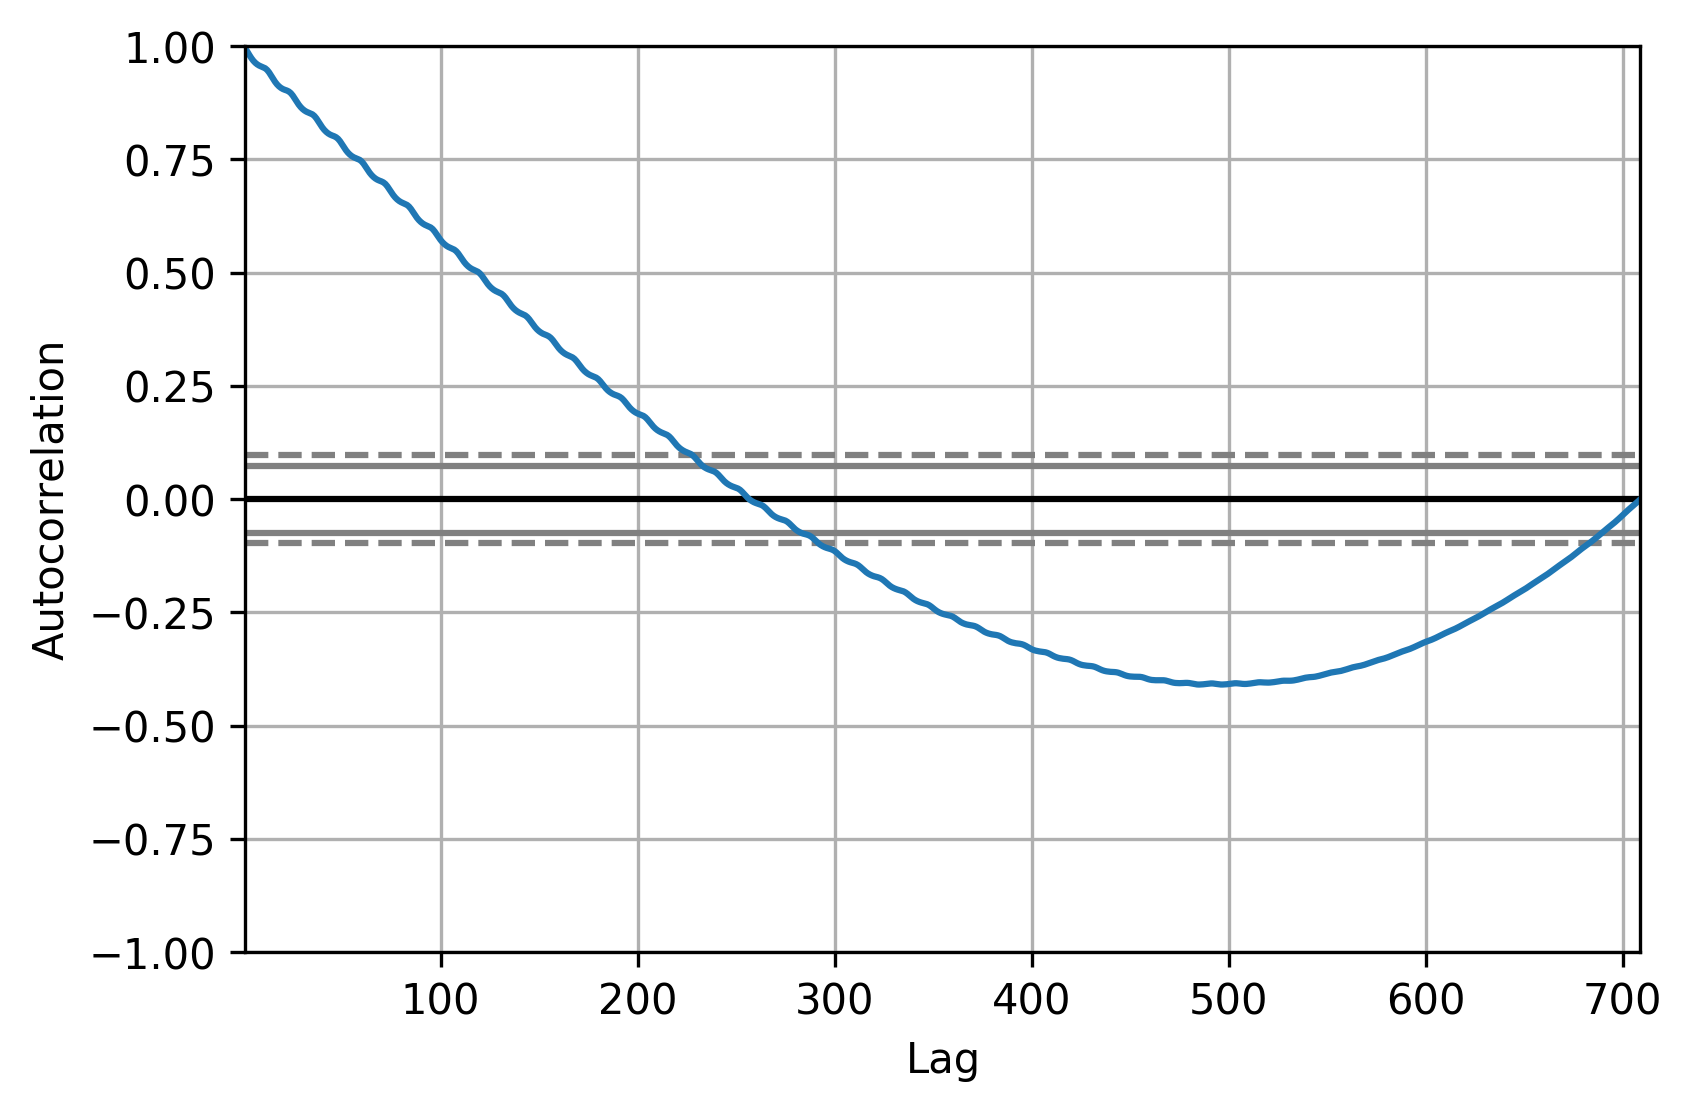

In [11]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(ppm)

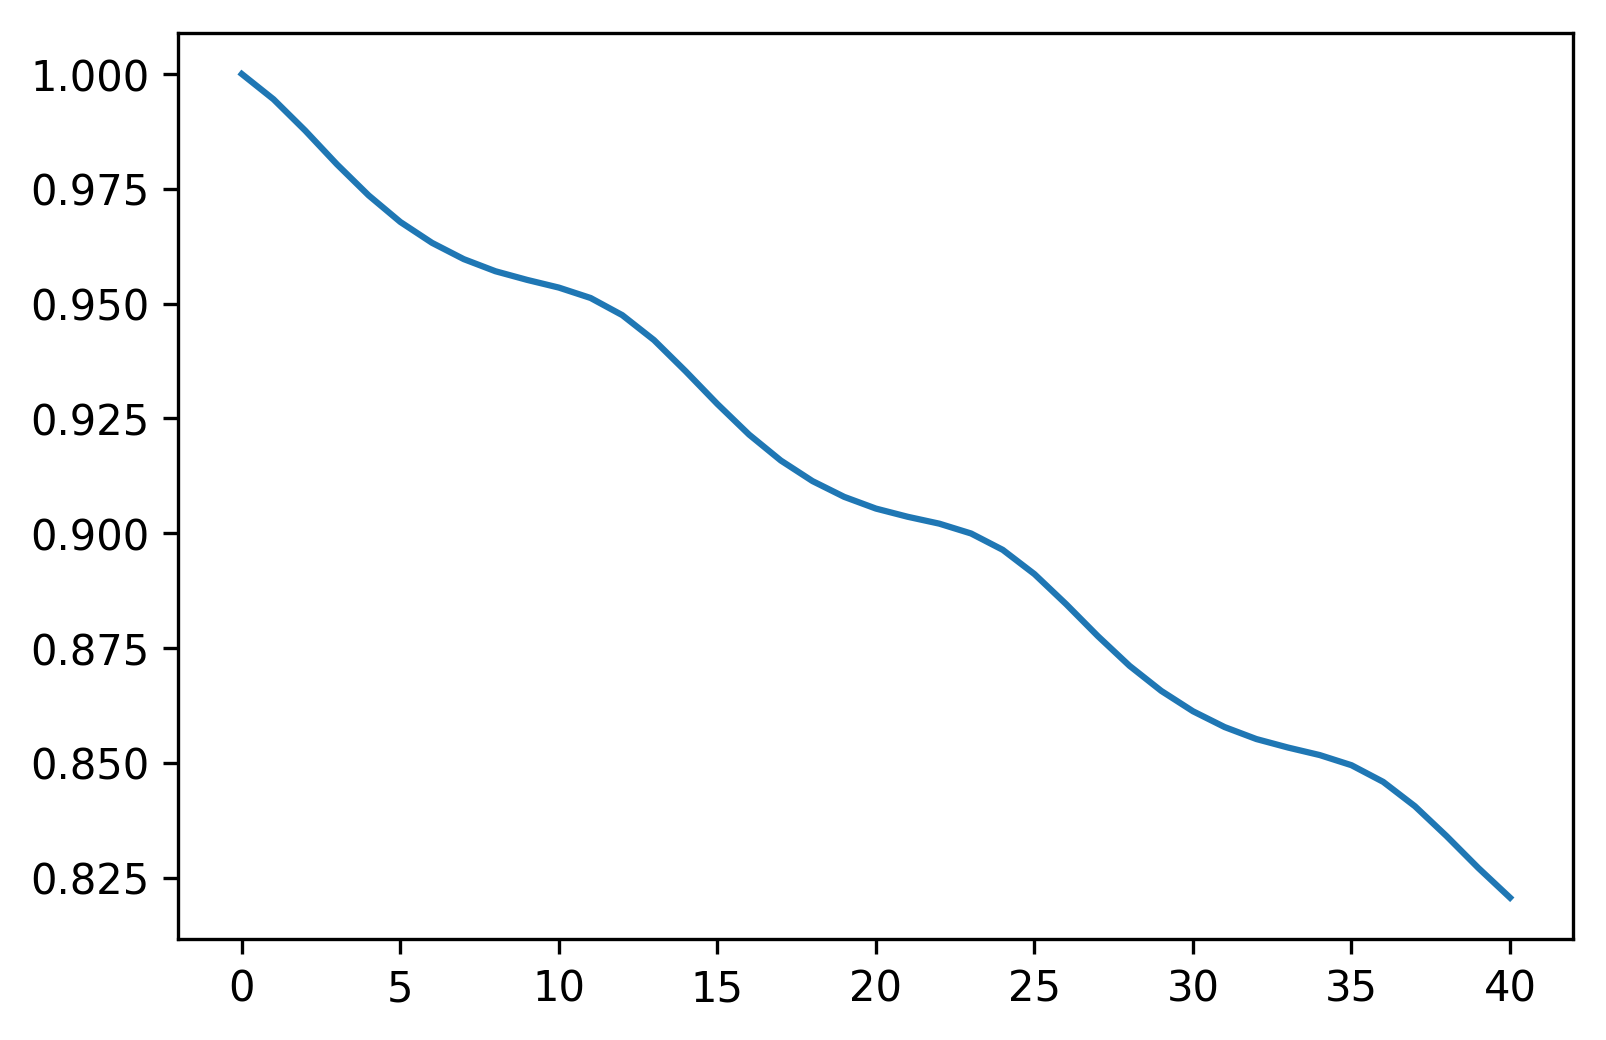

In [245]:
from statsmodels.tsa.stattools import acf
autocorrelation = acf(ppm)
plt.plot(autocorrelation)

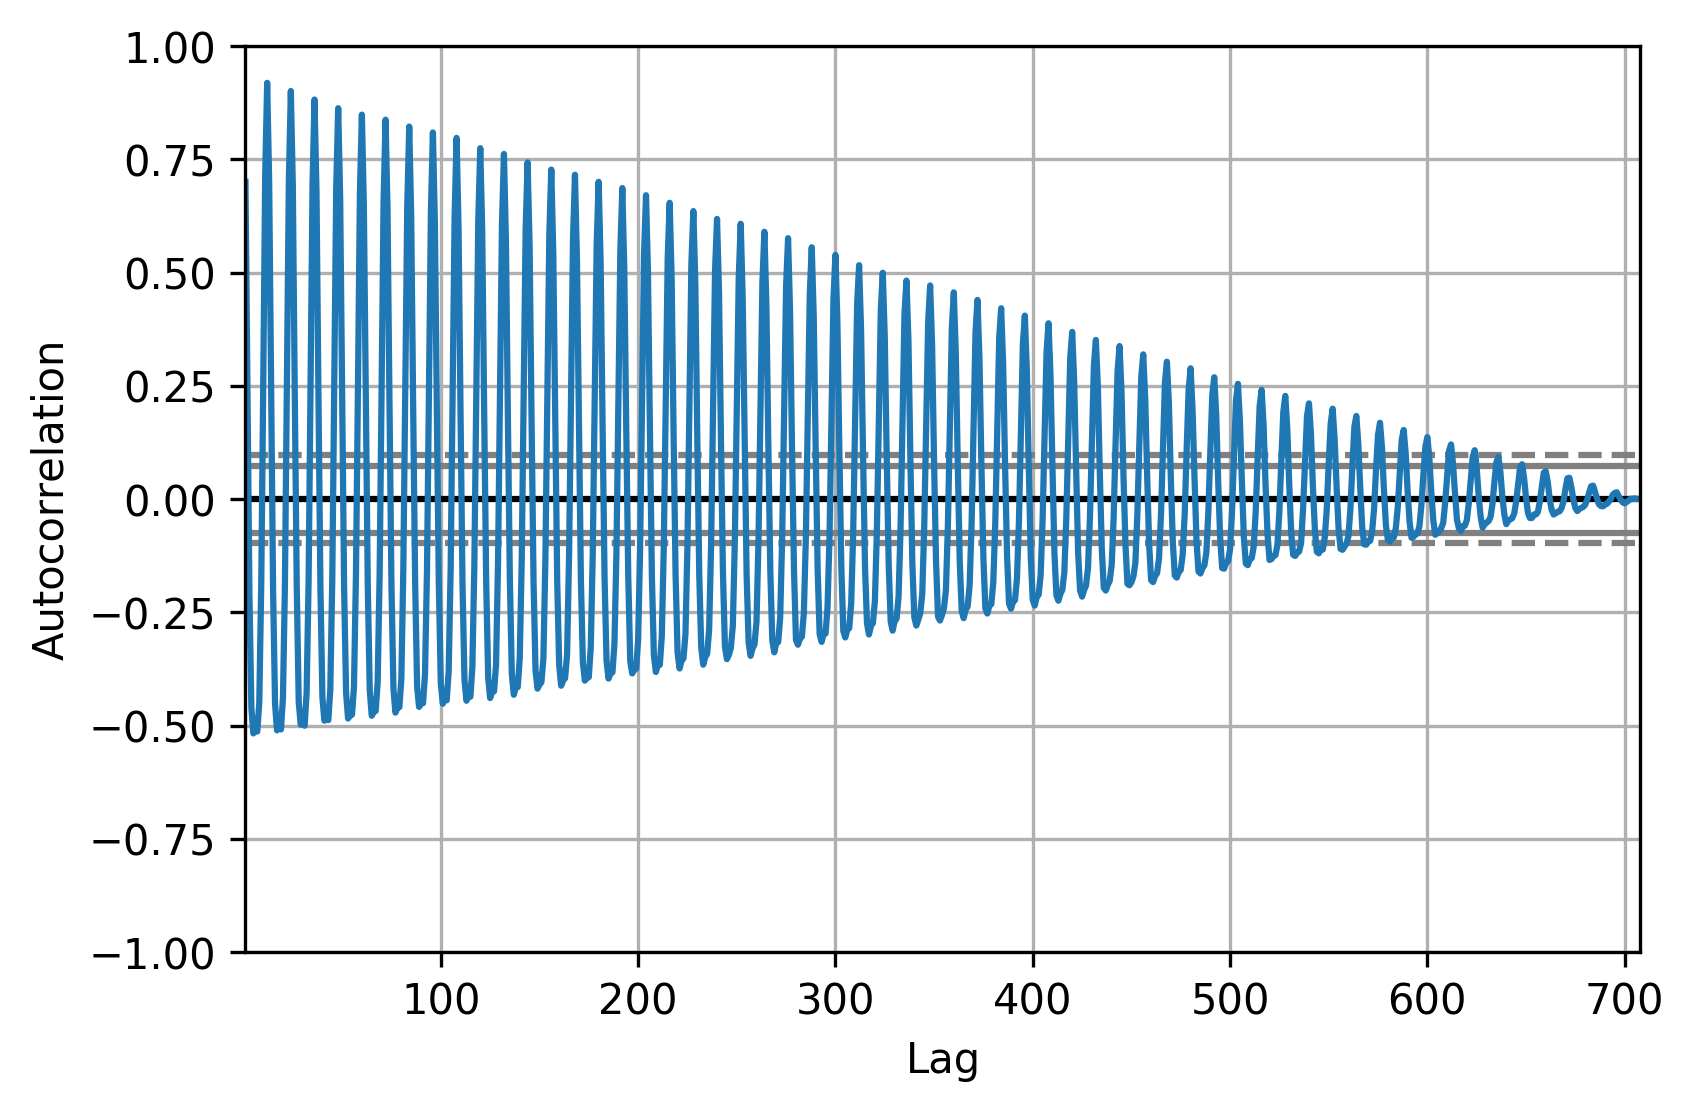

In [248]:
autocorrelation_plot(ppm.diff()[1:])

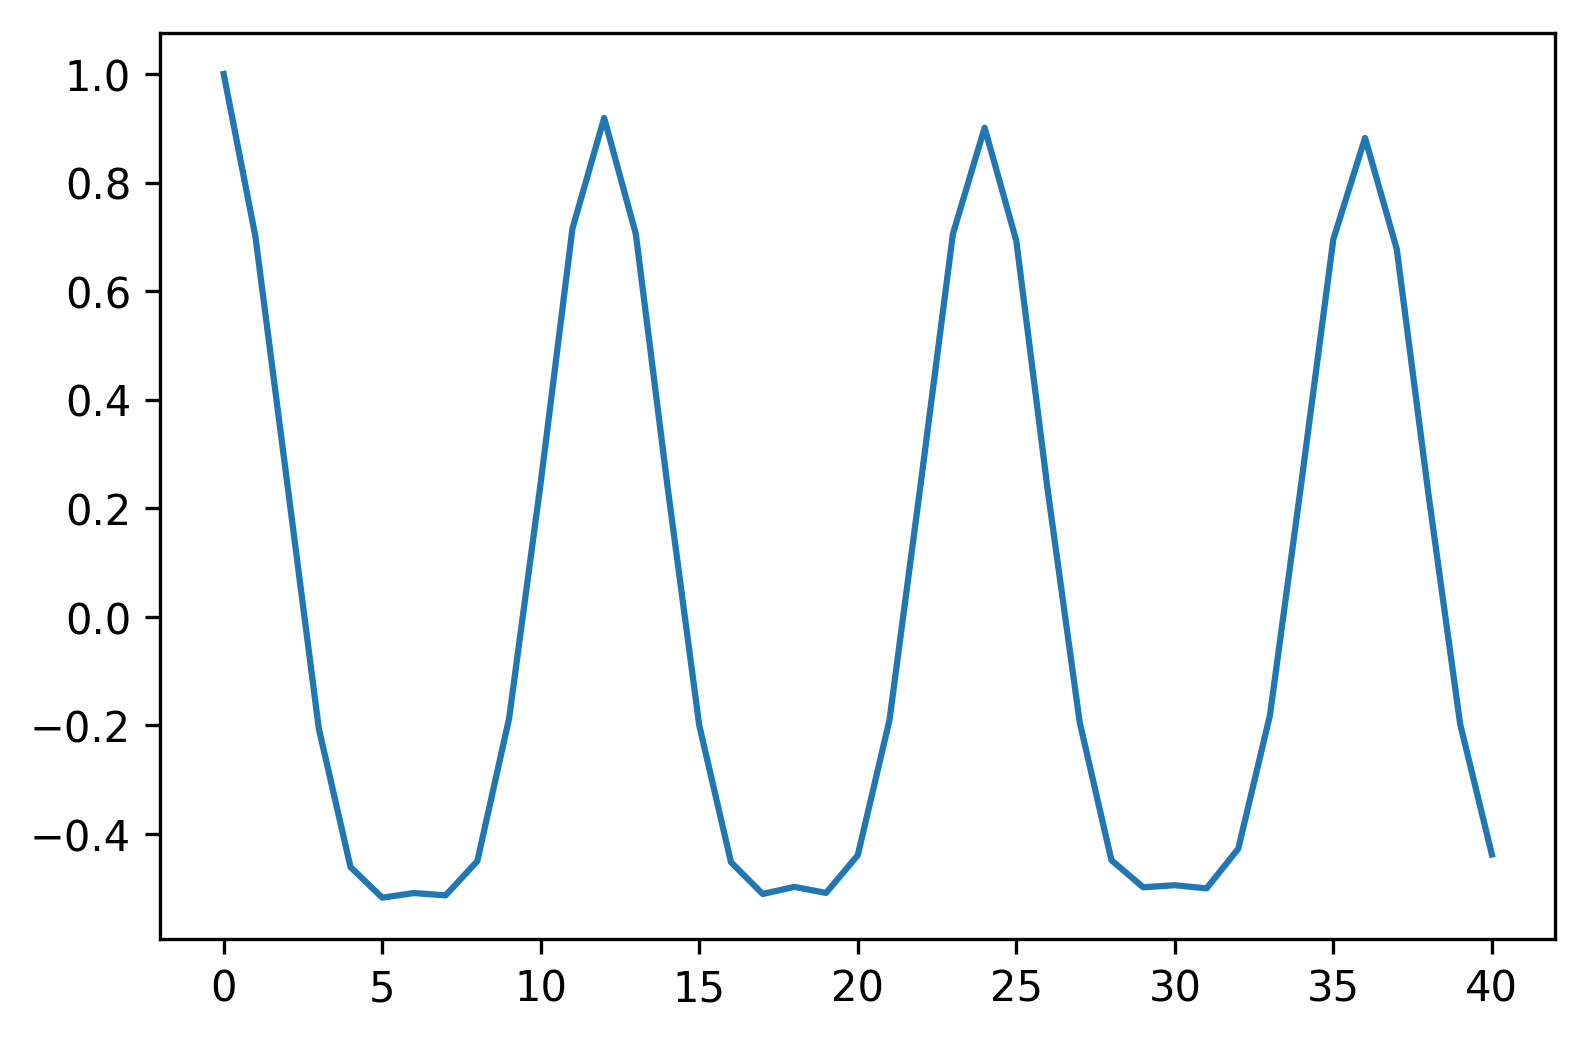

In [252]:
from statsmodels.tsa.stattools import acf
autocorrelation = acf(ppm.diff()[1:])
plt.plot(autocorrelation)

In [12]:
aapl = pd.read_csv("http://ichart.finance.yahoo.com/table.csv?s=AAPL")

In [13]:
aapl.head()

Date        Open        High         Low       Close    Volume  \
0  2017-04-21  142.440002  142.679993  141.850006  142.270004  17245200   
1  2017-04-20  141.220001  142.919998  141.160004  142.440002  23251100   
2  2017-04-19  141.880005  142.000000  140.449997  140.679993  17271300   
3  2017-04-18  141.410004  142.039993  141.110001  141.199997  14660800   
4  2017-04-17  141.479996  141.880005  140.869995  141.830002  16424000   

    Adj Close  
0  142.270004  
1  142.440002  
2  140.679993  
3  141.199997  
4  141.830002

In [14]:
aapl.set_index("Date", inplace=True)
aapl.sort_index(inplace=True)

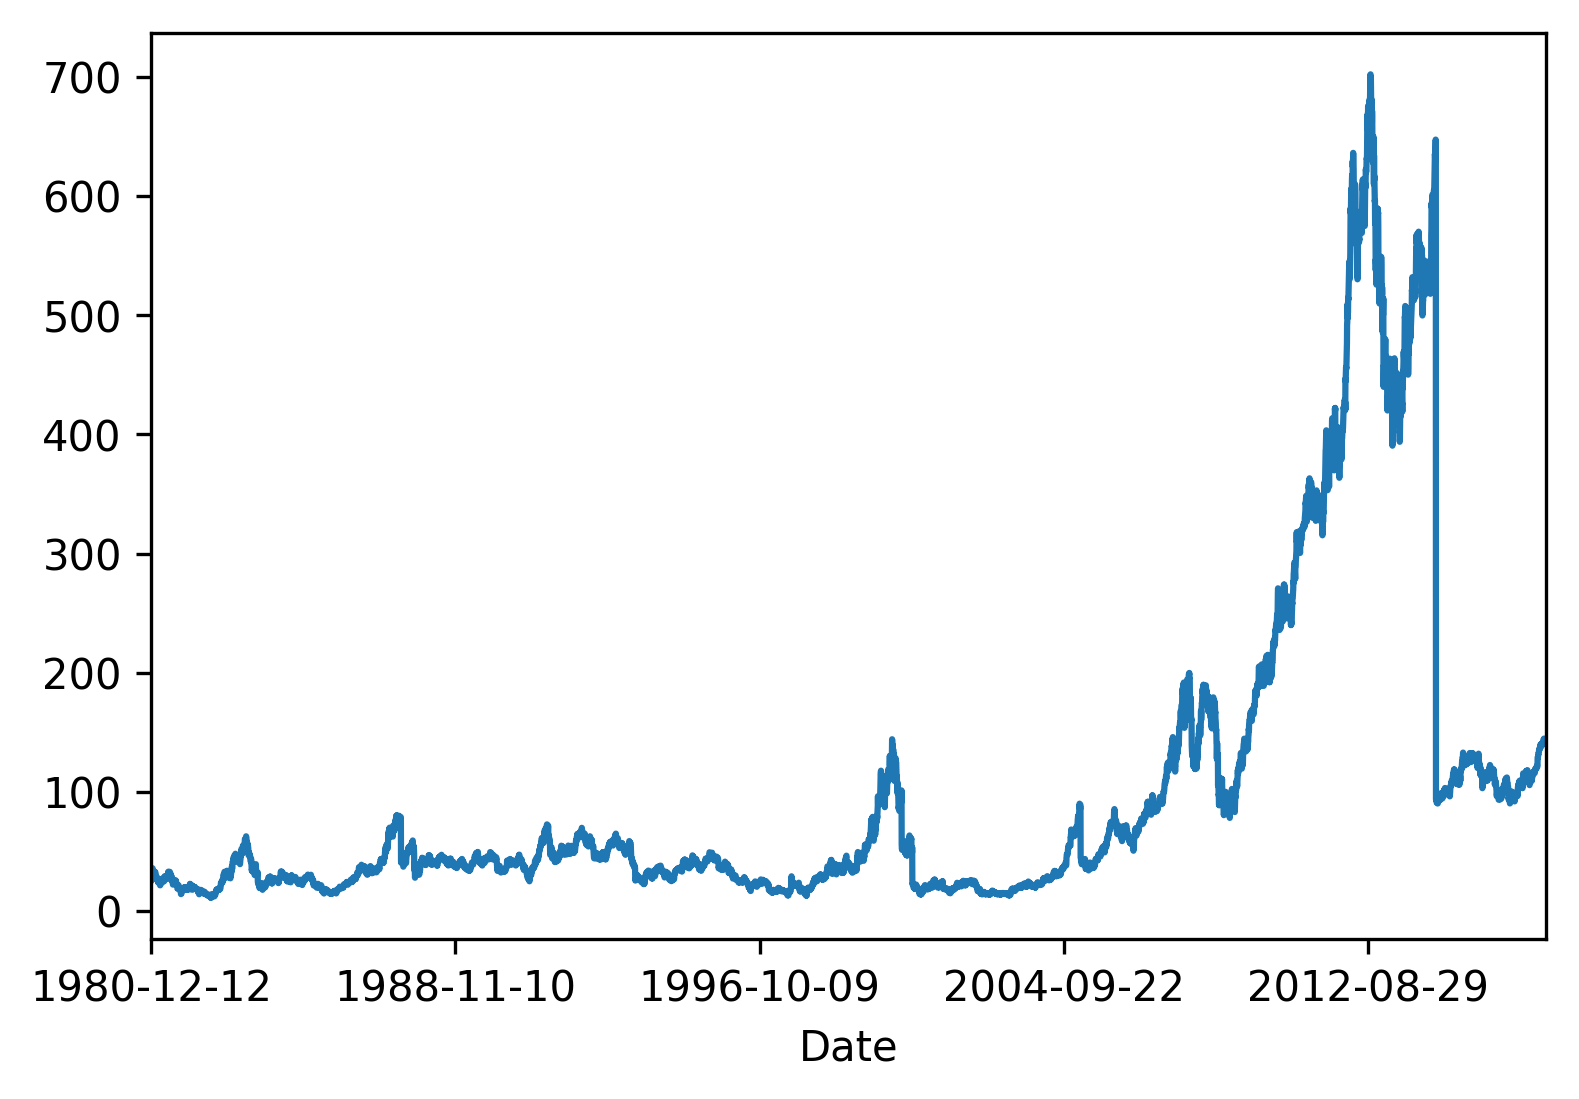

In [15]:
aapl.Close.plot()

In [145]:
msft = pd.read_csv("http://ichart.finance.yahoo.com/table.csv?s=MSFT", parse_dates=["Date"], index_col='Date')

In [16]:
goog = pd.read_csv("http://ichart.finance.yahoo.com/table.csv?s=GOOG", parse_dates=["Date"])

In [17]:
goog.set_index("Date", inplace=True)
goog.sort_index(inplace=True)

In [151]:
combined_stock = pd.concat([goog.Close, aapl.Close, msft.Close], axis=1)

In [160]:
combined_stock.columns = ['GOOG', 'AAPL', 'MSFT']

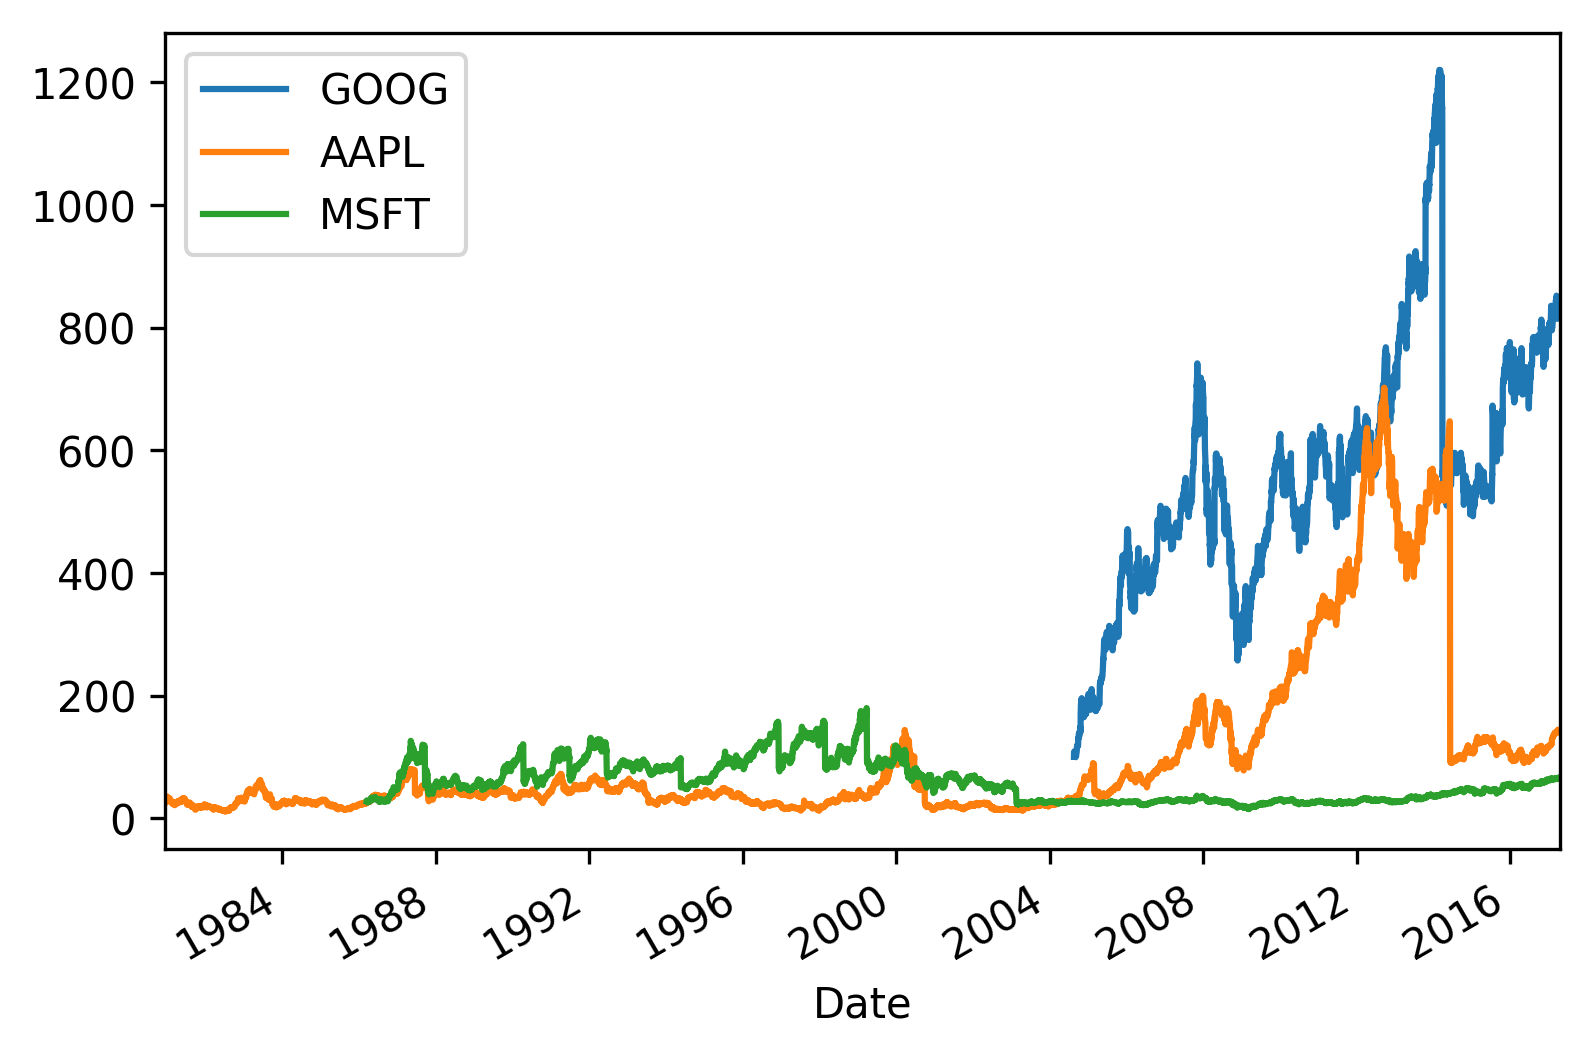

In [161]:
combined_stock.plot()

In [19]:
goog.Close.autocorr()

0.99748320458605422

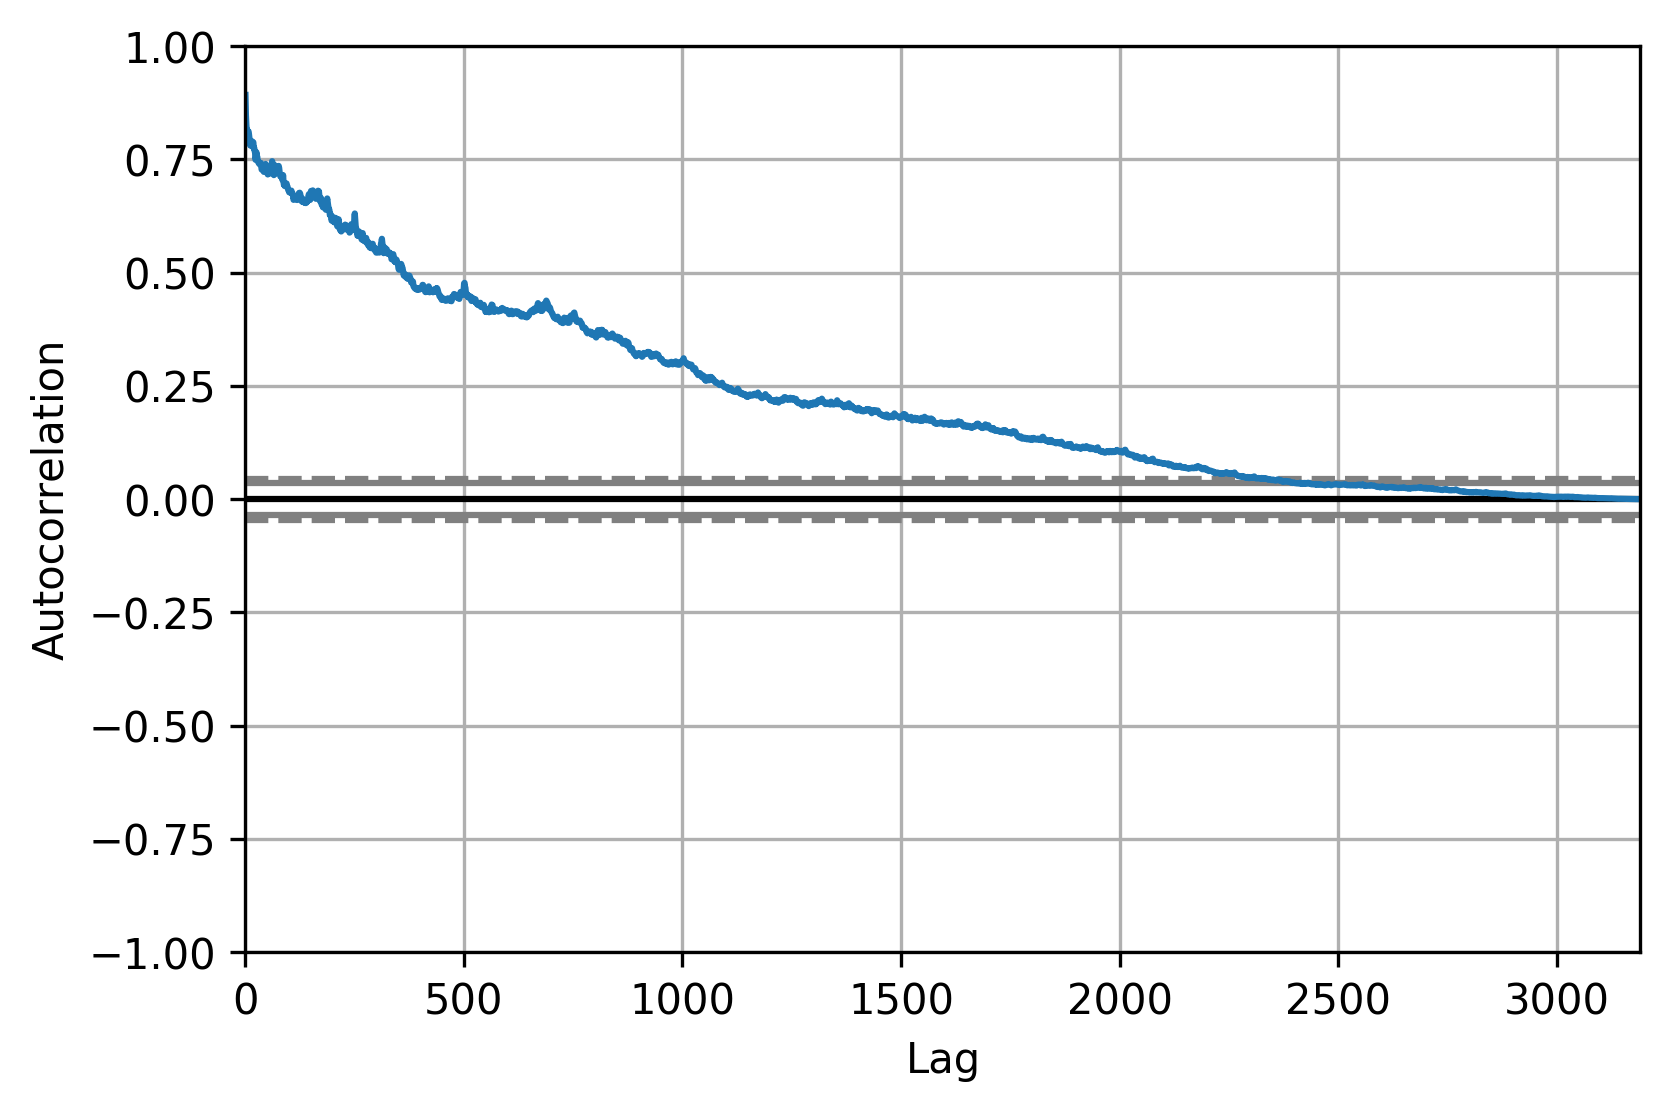

In [20]:
autocorrelation_plot(goog)


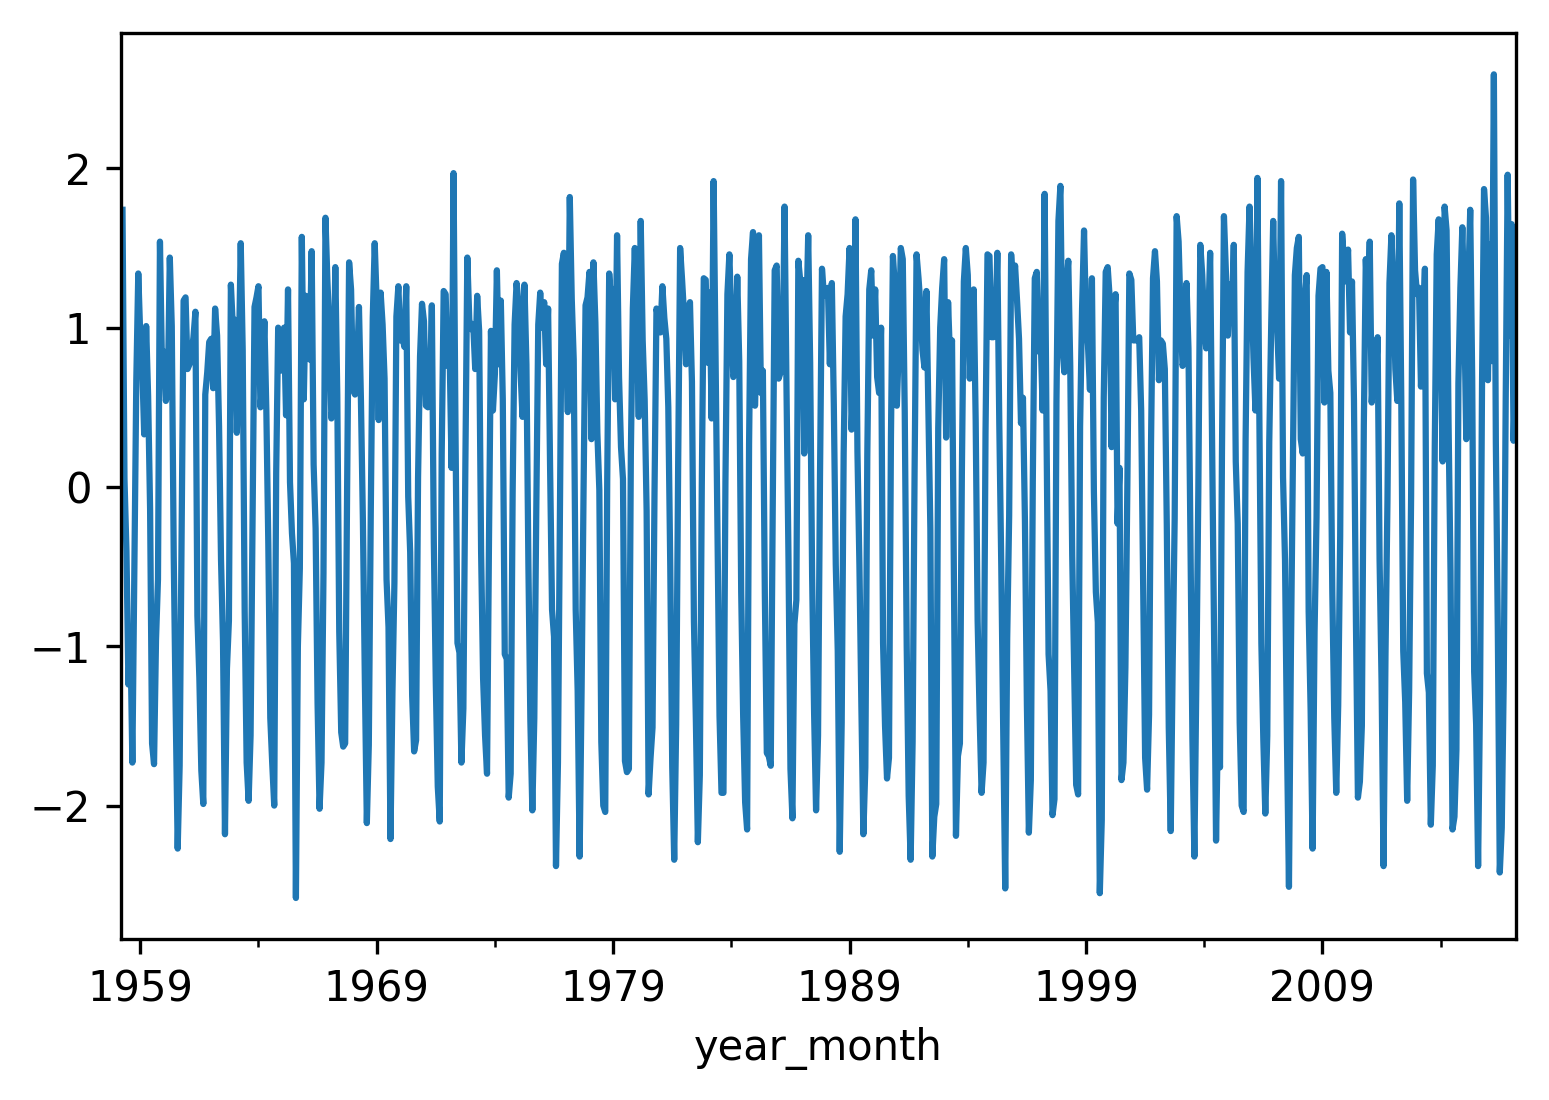

In [222]:
ppm.diff().plot()

# Seasonal model for co2

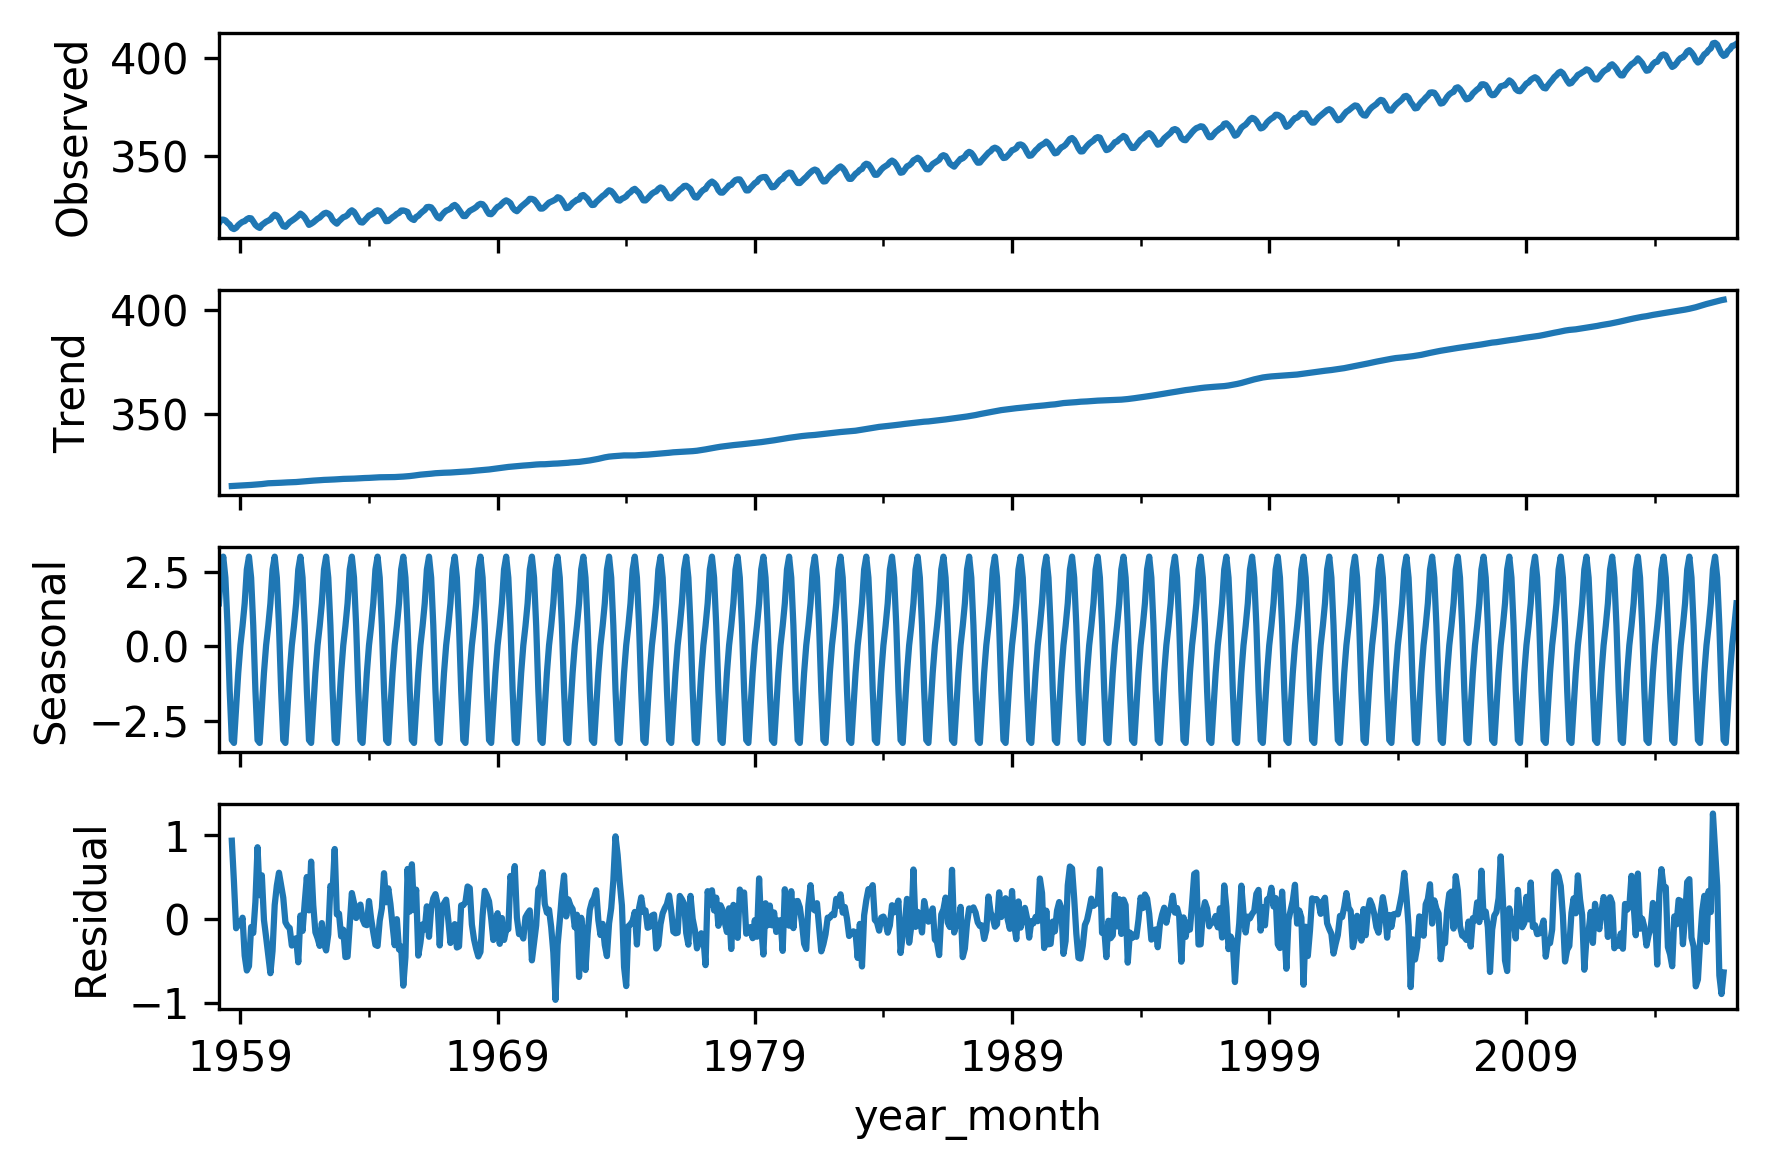

In [253]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ppm, model='additive')
fig = decomposition.plot()
#fig.set_figheight(6)
fig.tight_layout()

In [24]:
ppm.shape

(709,)

In [265]:
from statsmodels.tsa import ar_model
ar = ar_model.AR(ppm[:500])
res = ar.fit(maxlag=12)
res.params

const              -2.018779
L1.interpolated     0.931758
L2.interpolated    -0.240629
L3.interpolated    -0.099048
L4.interpolated    -0.076488
L5.interpolated     0.164472
L6.interpolated    -0.000531
L7.interpolated    -0.023481
L8.interpolated    -0.125134
L9.interpolated     0.100288
L10.interpolated   -0.021266
L11.interpolated    0.414740
L12.interpolated   -0.017268
dtype: float64

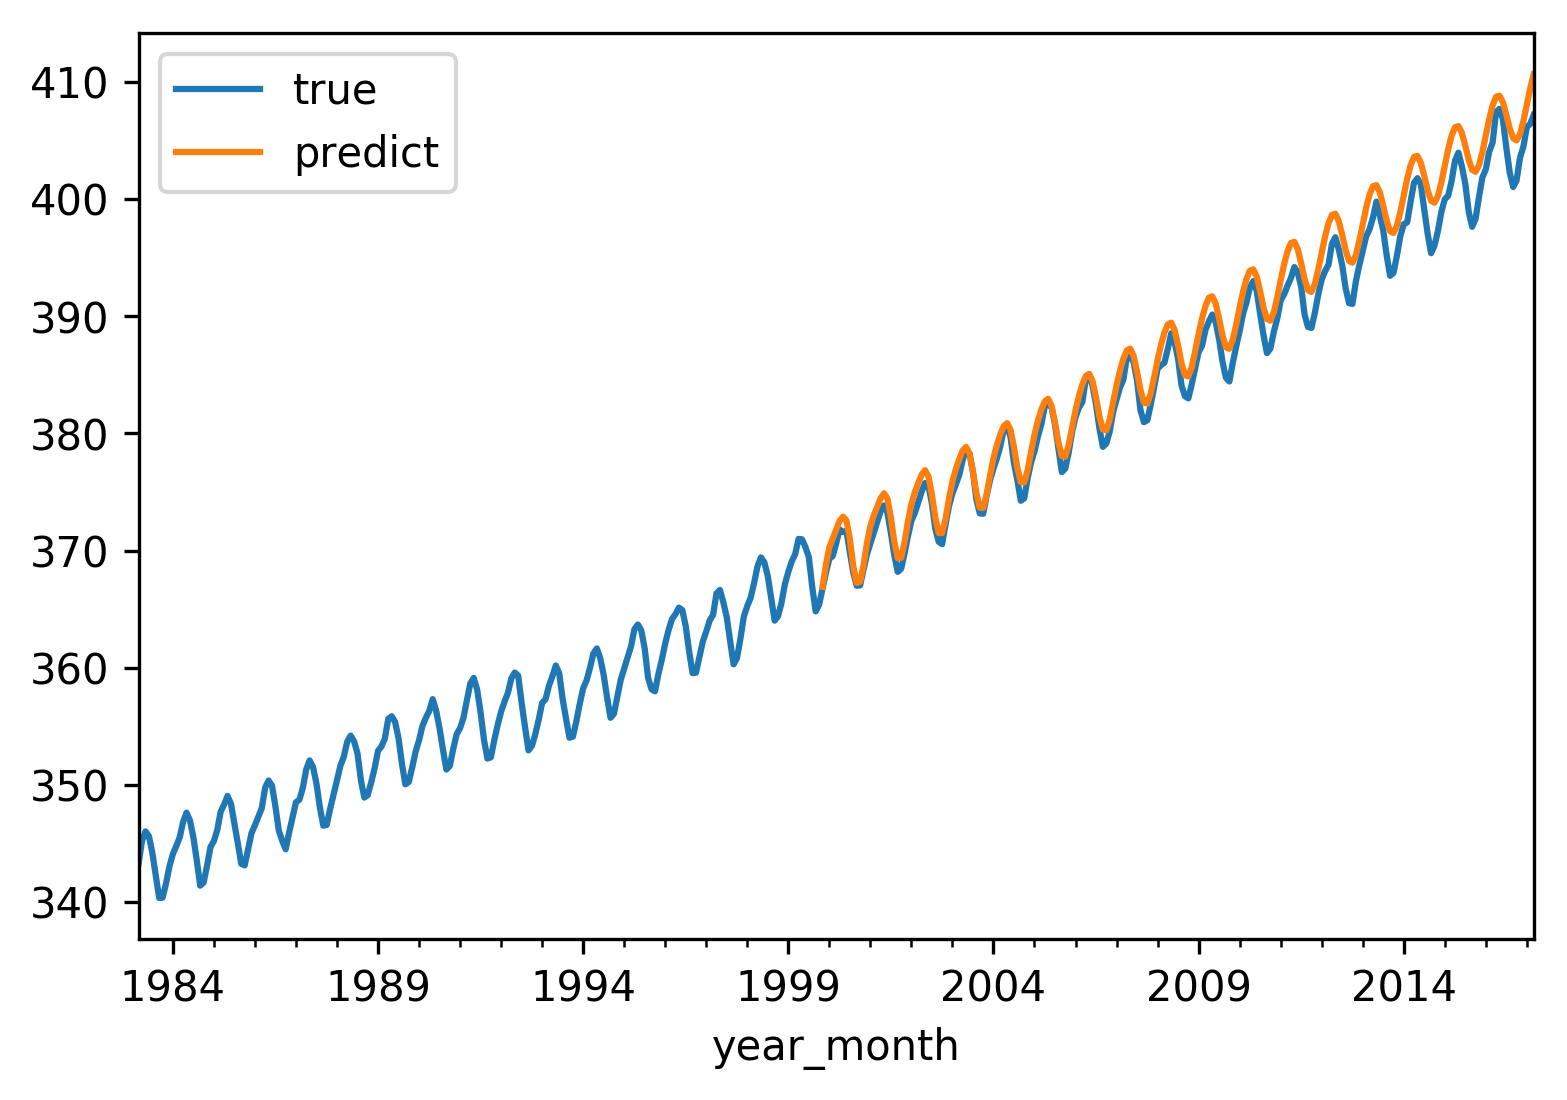

In [266]:
ppm[300:].plot(label="true")
res.predict(ppm.index[500], ppm.index[-1]).plot(label="predict")
plt.legend(loc="best")

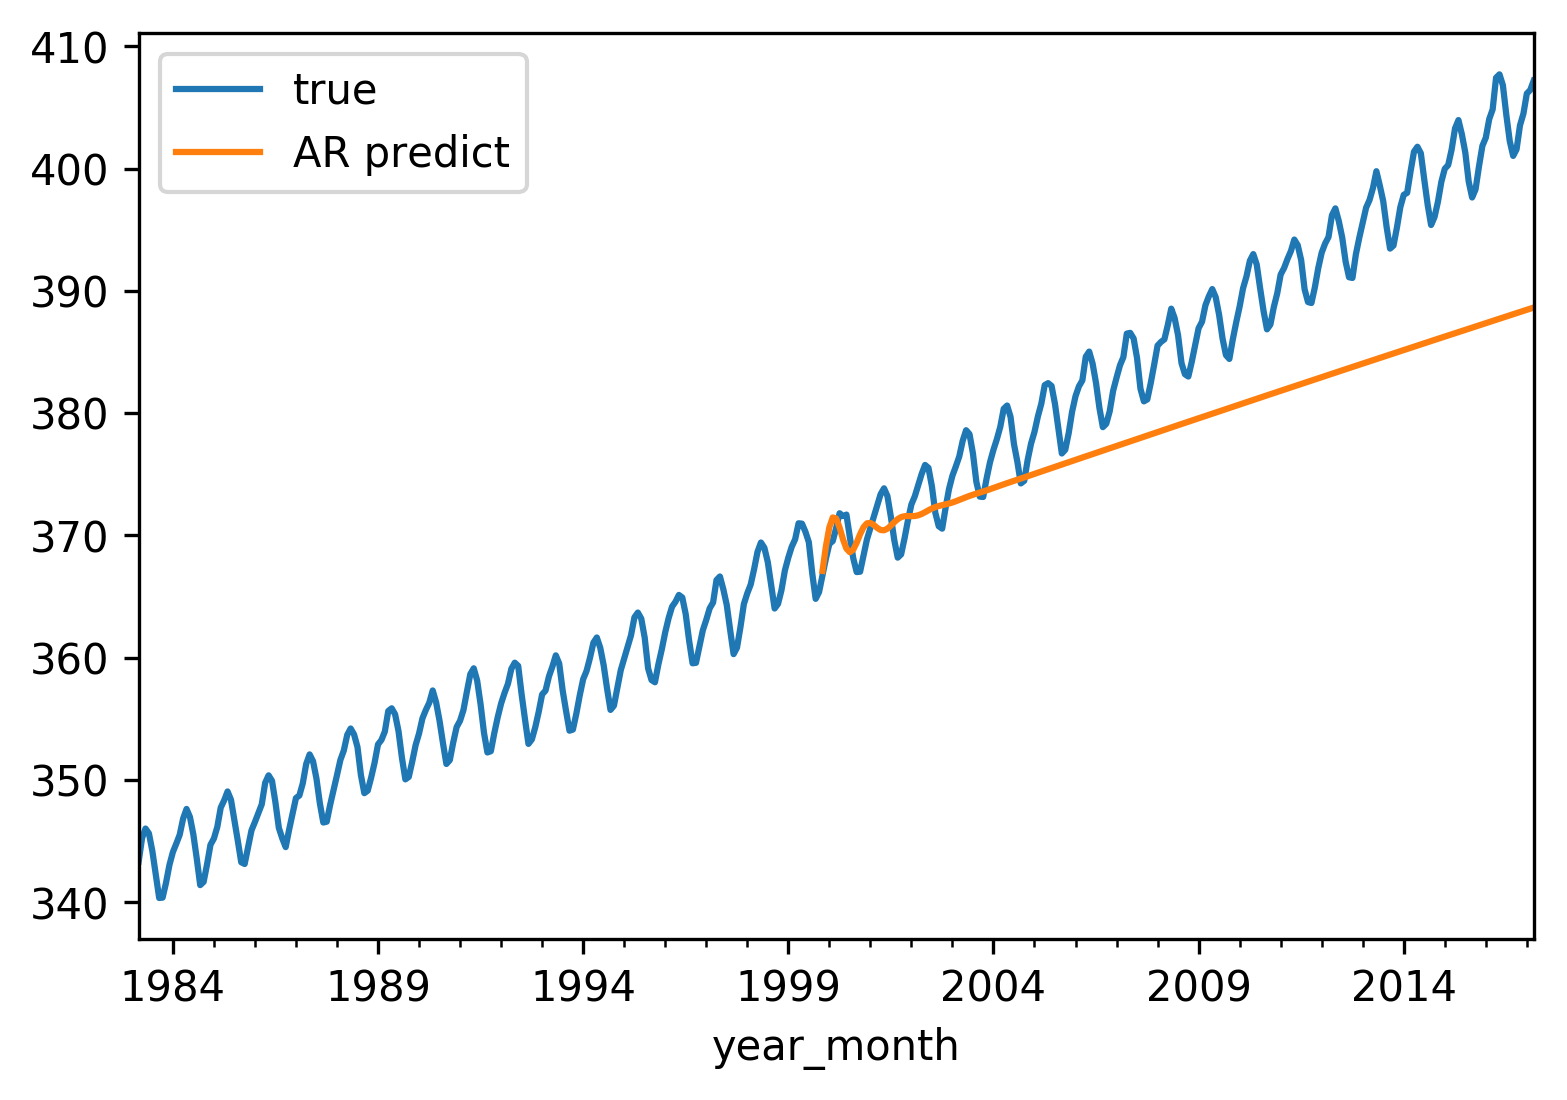

In [267]:
ar6 = ar_model.AR(ppm[:500])
res = ar6.fit(maxlag=6)
ar_pred = res.predict(ppm.index[500], ppm.index[-1])
ppm[300:].plot(label="true")
ar_pred.plot(label="AR predict")
plt.legend(loc="best")


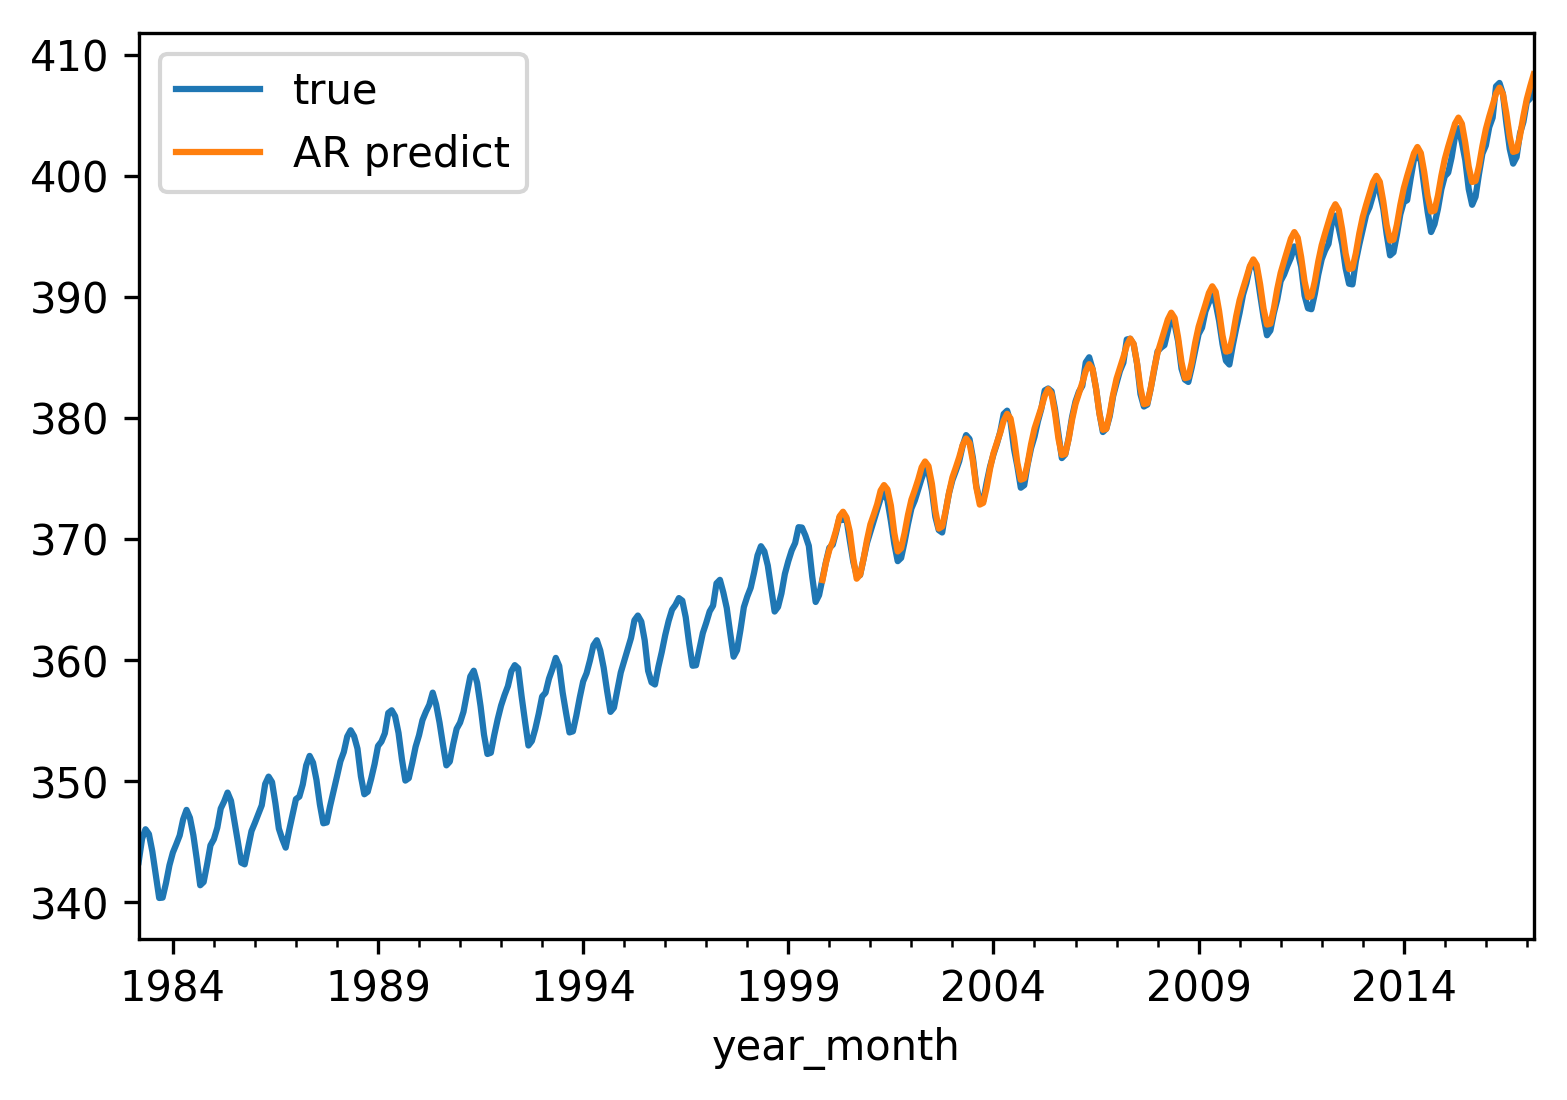

In [268]:
ar25 = ar_model.AR(ppm[:500])
res = ar25.fit(maxlag=25)
ar_pred = res.predict(ppm.index[500], ppm.index[-1])
ppm[300:].plot(label="true")
ar_pred.plot(label="AR predict")
plt.legend(loc="best")


/home/andy/anaconda3/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


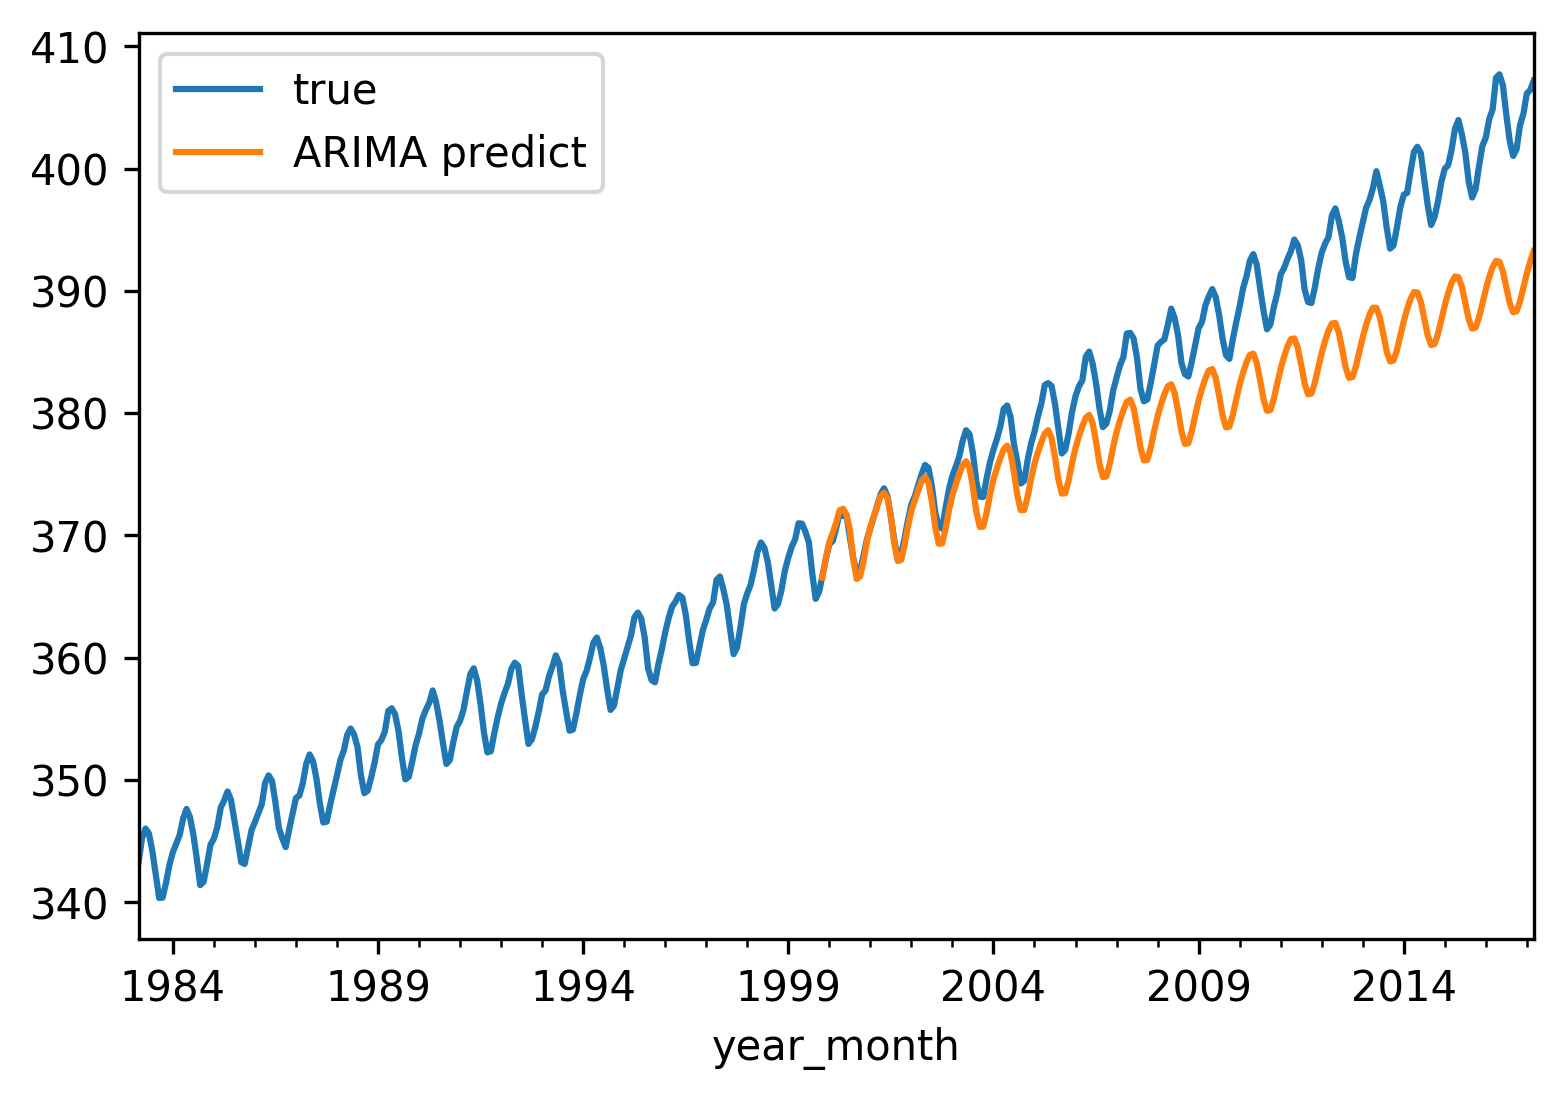

In [273]:
from statsmodels import tsa

arima_model = tsa.arima_model.ARIMA(ppm[:500], order=(12, 1, 0))
res = arima_model.fit()
arima_pred = res.predict(ppm.index[500], ppm.index[-1], typ="levels")
ppm[300:].plot(label="true")
arima_pred.plot(label="ARIMA predict")
plt.legend(loc="best")

# building our own model

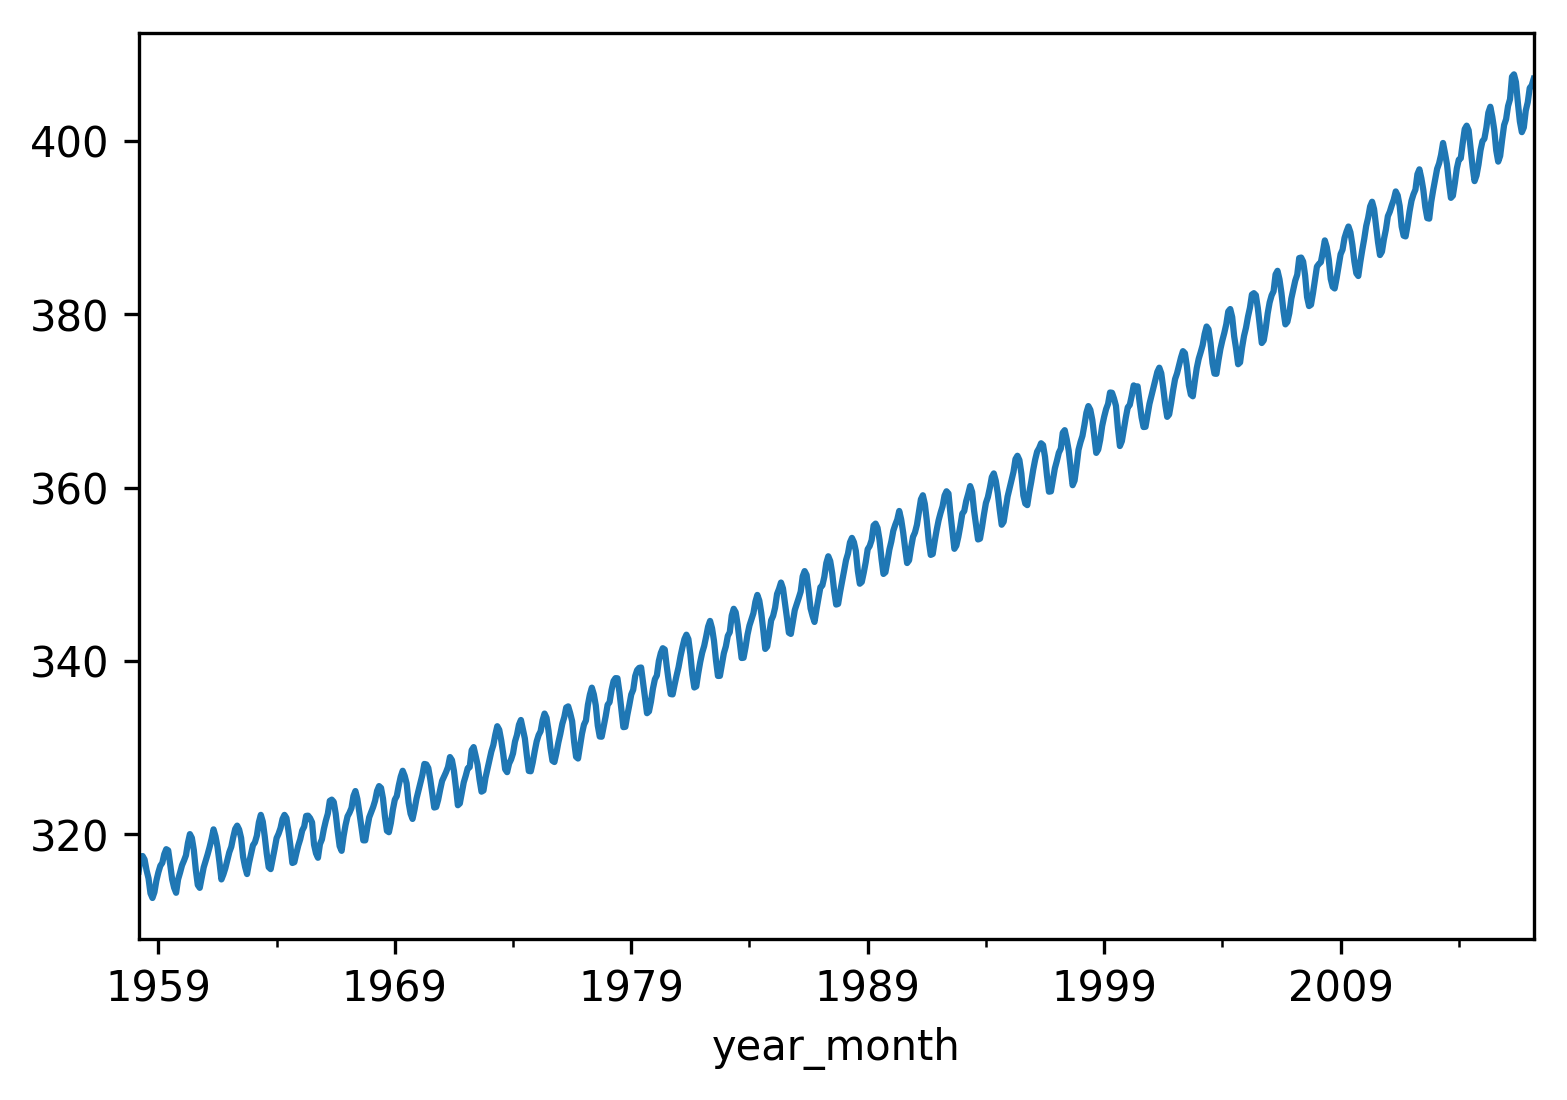

In [26]:
ppm.plot()

In [274]:
ppm.shape

(709,)

In [275]:
train = ppm[:500]
test = ppm[500:]

In [279]:
X = ppm.index.to_series().apply(lambda x: x.toordinal())
X = pd.DataFrame(X)

X_train, X_test = X.iloc[:500, :], X.iloc[500:, :]
X_train.shape

(500, 1)

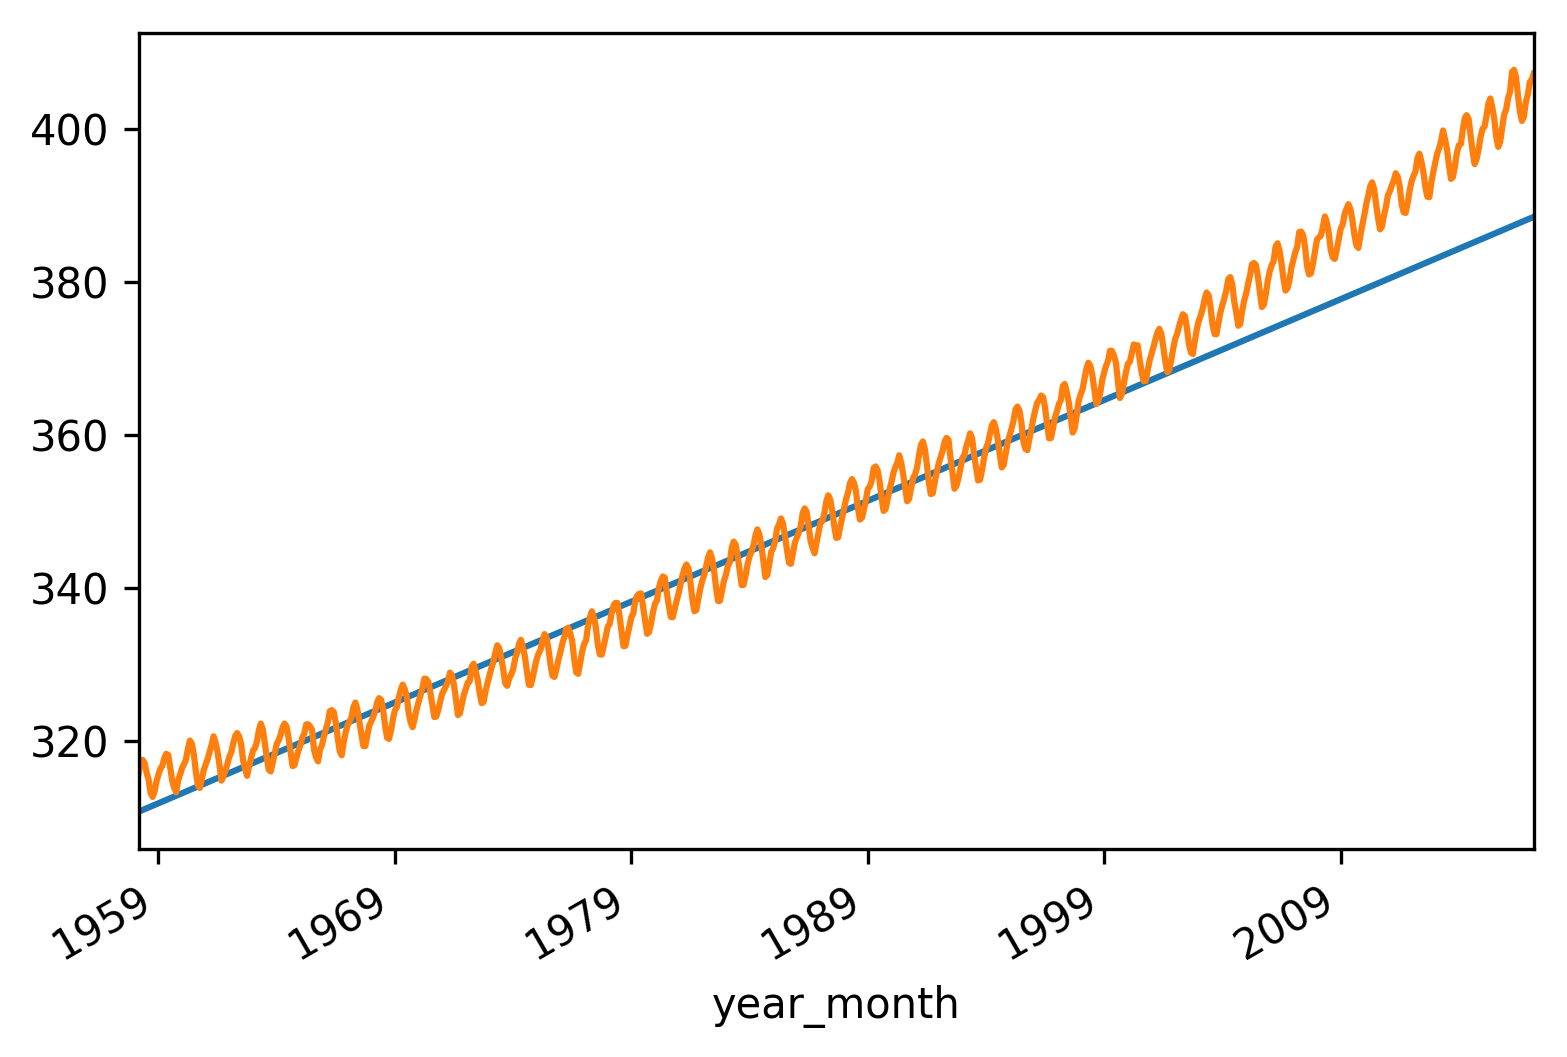

In [278]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, train)
lr_pred = lr.predict(X_test)
plt.plot(ppm.index, lr.predict(X))
ppm.plot()

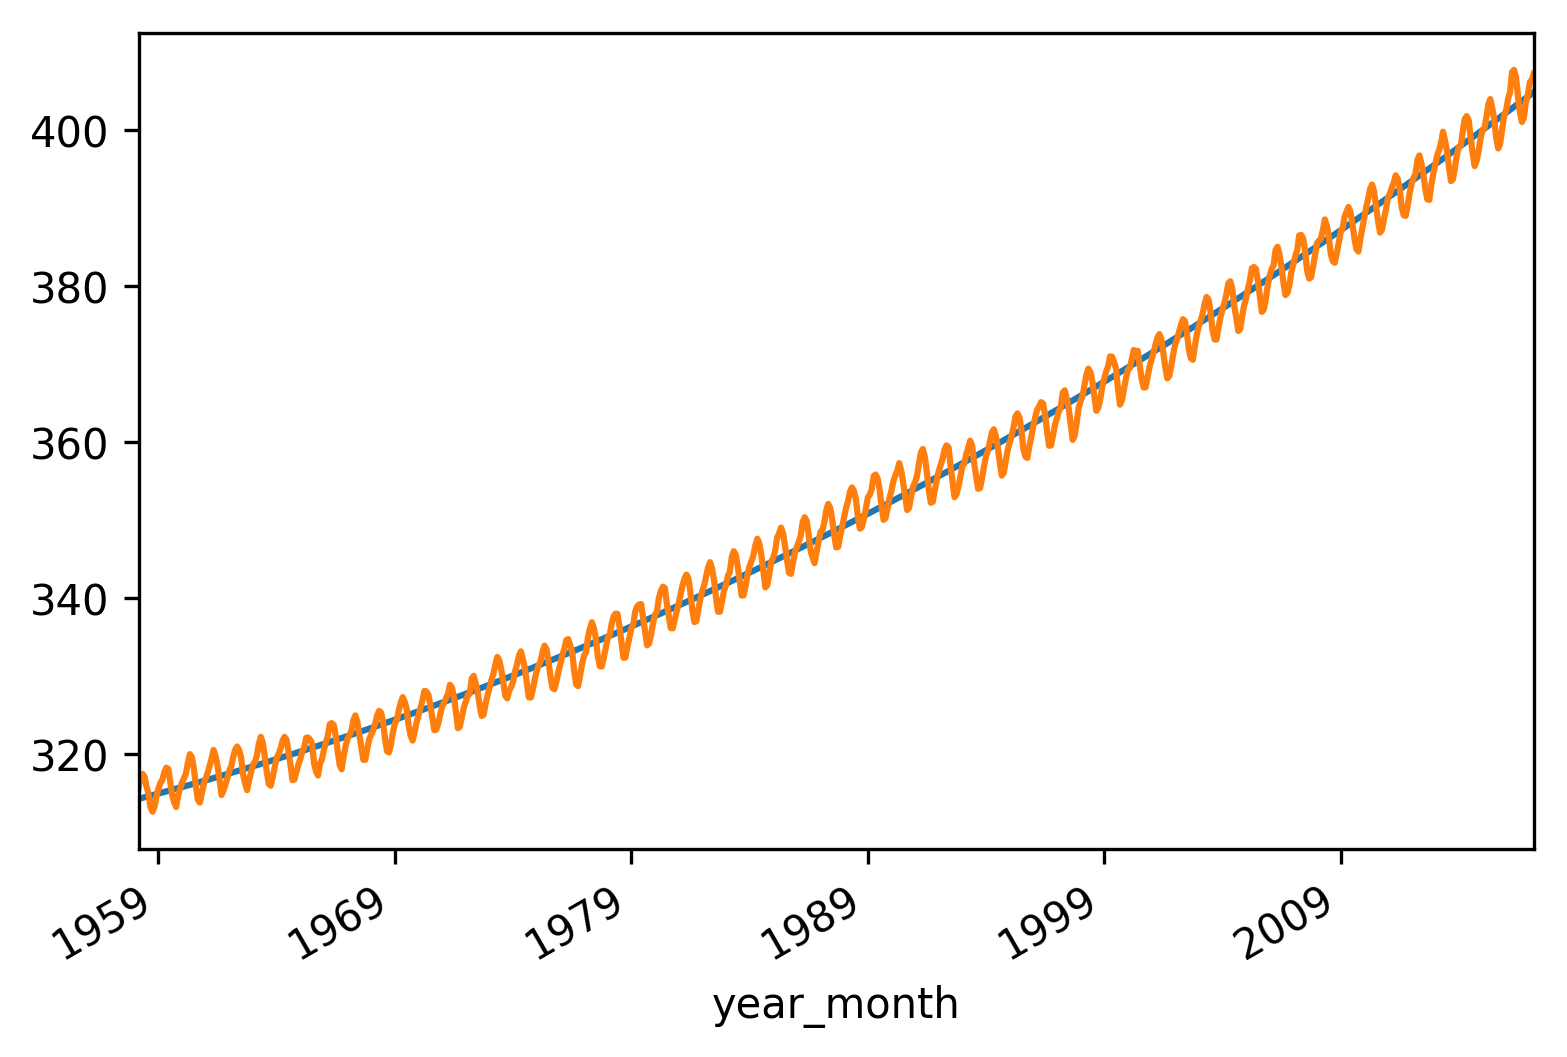

In [281]:
from sklearn.preprocessing import PolynomialFeatures
lr_poly = make_pipeline(PolynomialFeatures(include_bias=False), LinearRegression())
lr_poly.fit(X_train, train)

plt.plot(ppm.index, lr_poly.predict(X))
ppm.plot()

# cross-validation

In [287]:
X_train

year_month
year_month            
1958-03-01      714839
1958-04-01      714870
1958-05-01      714900
1958-06-01      714931
1958-07-01      714961
1958-08-01      714992
1958-09-01      715023
1958-10-01      715053
1958-11-01      715084
1958-12-01      715114
1959-01-01      715145
1959-02-01      715176
1959-03-01      715204
1959-04-01      715235
1959-05-01      715265
1959-06-01      715296
1959-07-01      715326
1959-08-01      715357
1959-09-01      715388
1959-10-01      715418
1959-11-01      715449
1959-12-01      715479
1960-01-01      715510
1960-02-01      715541
1960-03-01      715570
1960-04-01      715601
1960-05-01      715631
1960-06-01      715662
1960-07-01      715692
1960-08-01      715723
...                ...
1997-05-01      729145
1997-06-01      729176
1997-07-01      729206
1997-08-01      729237
1997-09-01      729268
1997-10-01      729298
1997-11-01      729329
1997-12-01      729359
1998-01-01      729390
1998-02-01      729421
1998-03-01      729449
1998-04-01      729480
1998-05-01      729510
1998-06-01      729541
1998-07-01      729571
1998-08-01      729602
1998-09-01      729633
1998-10-01      729663
1998-11-01      729694
1998-12-01      729724
1999-01-01      729755
1999-02-01      729786
1999-03-01      729814
1999-04-01      729845
1999-05-01      729875
1999-06-01      729906
1999-07-01      729936
1999-08-01      729967
1999-09-01      729998
1999-10-01      730028

[500 rows x 1 columns]

In [328]:
from sklearn.model_selection import cross_val_score, TimeSeriesSplit
scores_iid = cross_val_score(LinearRegression(), X_train, train, cv=10,
                             scoring="neg_mean_squared_error")
np.mean(scores_iid)

-9.8361863973708381

In [329]:
scores_time = cross_val_score(LinearRegression(), X_train, train, cv=TimeSeriesSplit(n_splits=10),
                              scoring="neg_mean_squared_error")
np.mean(scores_time)

-10.295812773030431

In [338]:
from sklearn.tree import DecisionTreeRegressor
scores_iid = cross_val_score(DecisionTreeRegressor(), X_train, train, cv=10,
                              scoring="neg_mean_squared_error")
np.mean(scores_iid)

-1.1261957663556819

In [339]:
scores_time = cross_val_score(DecisionTreeRegressor(), X_train, train, cv=TimeSeriesSplit(n_splits=10),
                              scoring="neg_mean_squared_error")
np.mean(scores_time)

-1.4065194575568585

In [310]:
from sklearn.model_selection import cross_val_predict
asdf = cross_val_predict(LinearRegression(), X_train.values, train.values, cv=10)

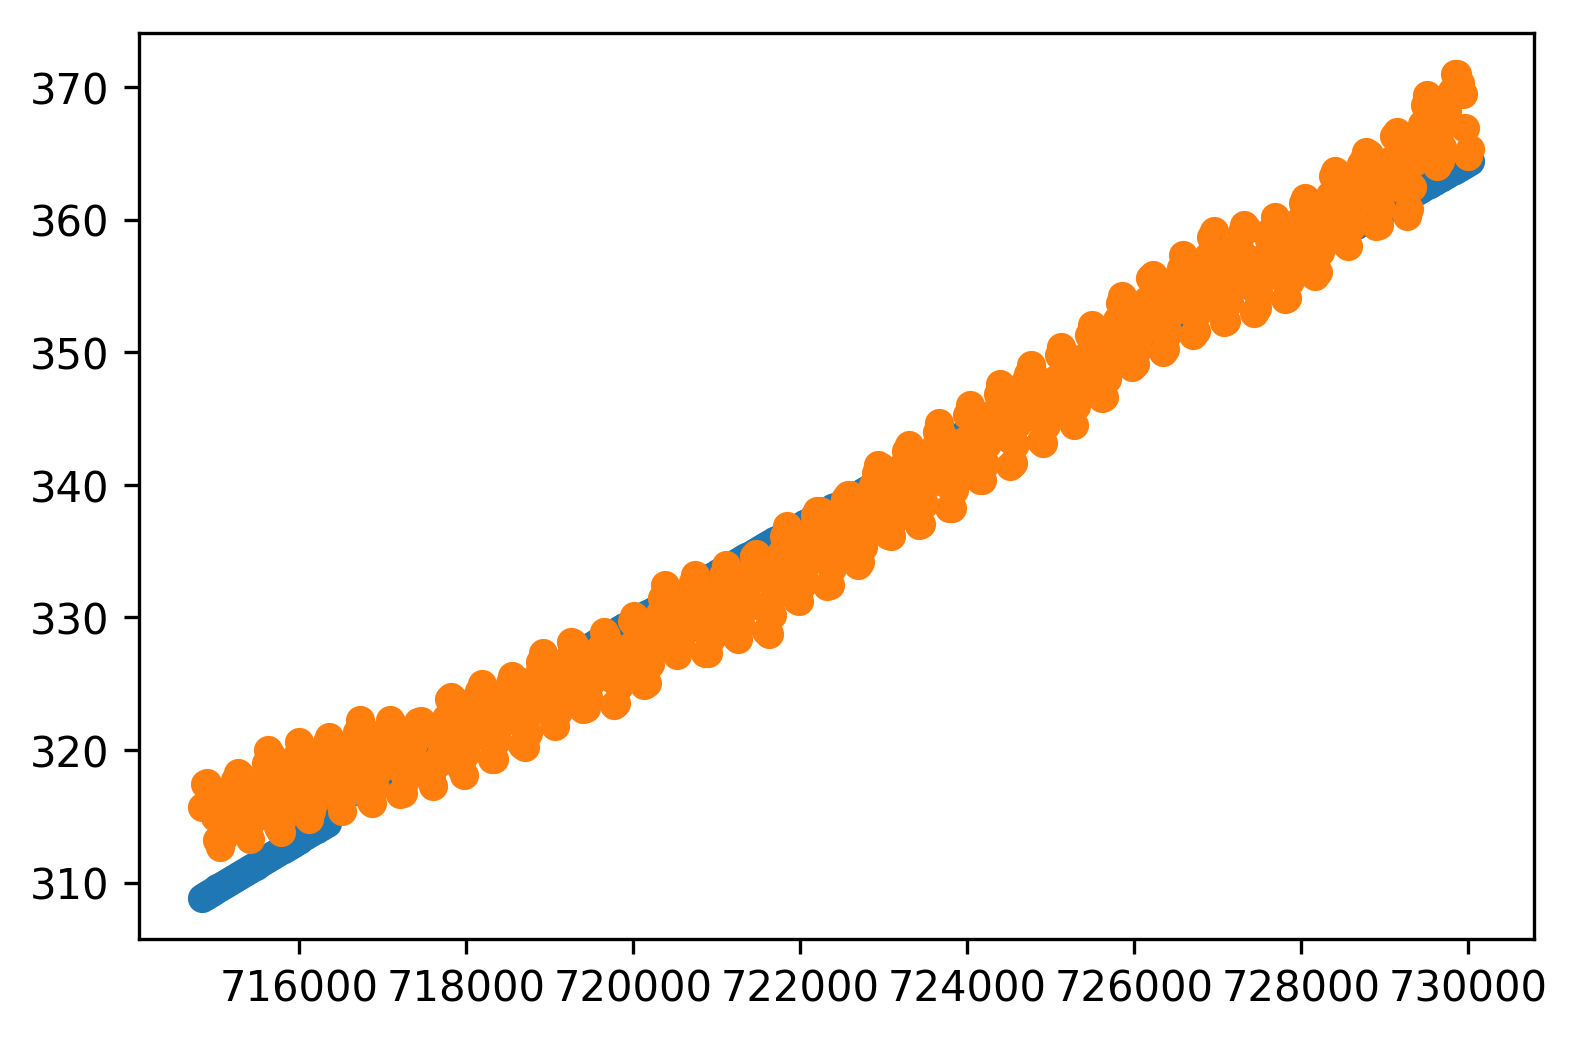

In [313]:
plt.plot(X_train, asdf, 'o')
plt.plot(X_train, train, 'o')

In [36]:
y_res = ppm - lr_poly.predict(X)

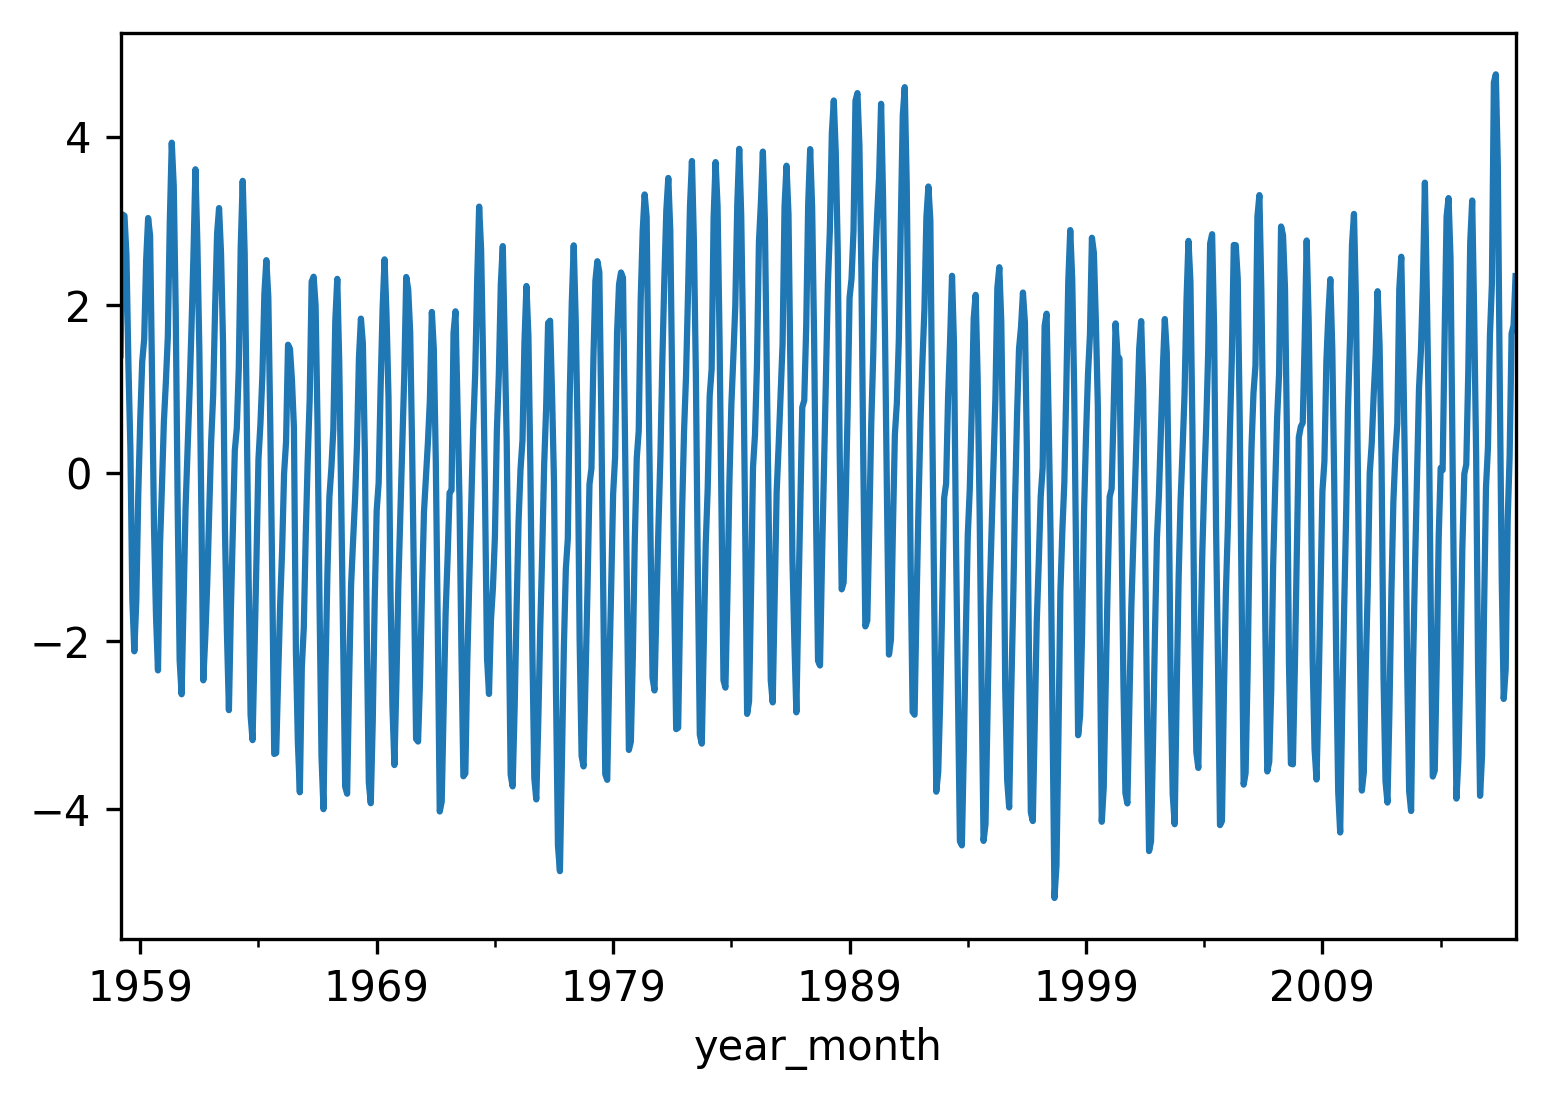

In [37]:
y_res.plot()

In [48]:
from statsmodels.tsa import arima_model
ar_model = arima_model.ARMA(ppm[:500].diff()[1:], order=(12, 0))
res = ar_model.fit()

/home/andy/anaconda3/lib/python3.5/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [49]:
ar_pred = res.predict(ppm.index[500], ppm.index[-1])
pred_arma_diff = np.cumsum(ar_pred) + ppm[500]

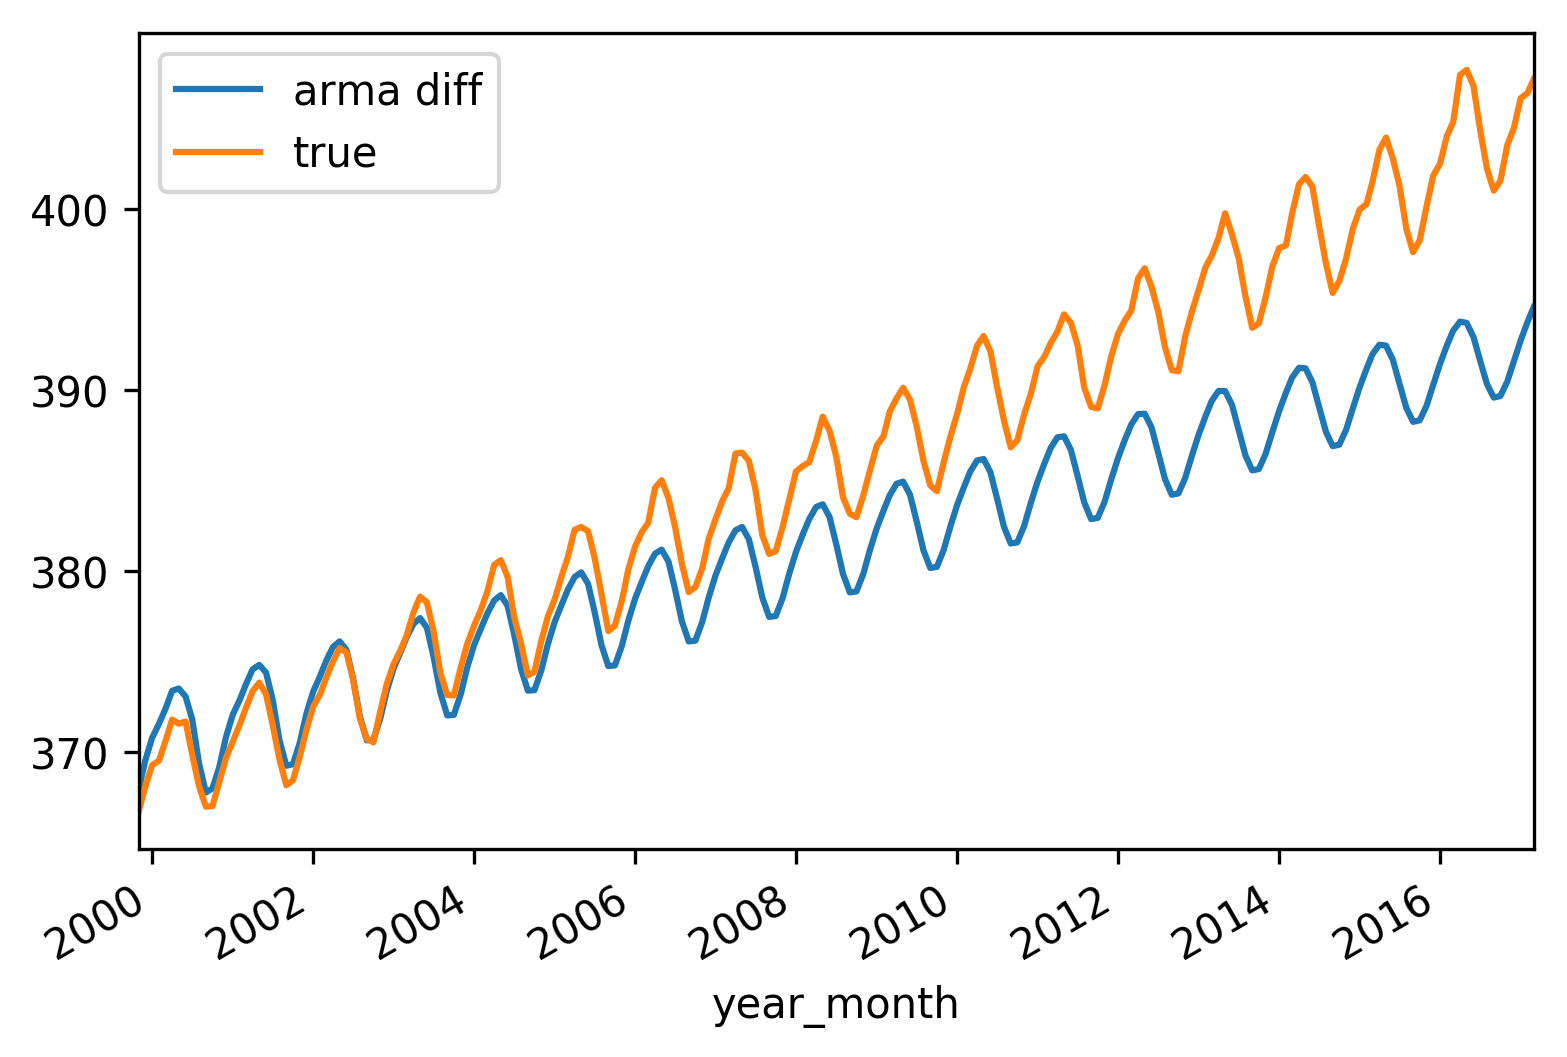

In [50]:
plt.plot(ppm.index[500:], pred_arma_diff, label="arma diff")
ppm[500:].plot(label="true")
plt.legend()

In [346]:
from statsmodels.tsa import ar_model
ar_model_res = ar_model.AR(y_res[:500])
res_res = ar_model_res.fit(maxlag=12)

In [347]:
ar_pred_res = res_res.predict(ppm.index[500], ppm.index[-1])
pred_ar_res = ar_pred_res + lr_poly.predict(X_test)

In [348]:
res_res.params

const              -0.008039
L1.interpolated     0.922508
L2.interpolated    -0.243015
L3.interpolated    -0.101173
L4.interpolated    -0.077538
L5.interpolated     0.158073
L6.interpolated    -0.006164
L7.interpolated    -0.023890
L8.interpolated    -0.126381
L9.interpolated     0.092664
L10.interpolated   -0.025640
L11.interpolated    0.414180
L12.interpolated   -0.018078
dtype: float64

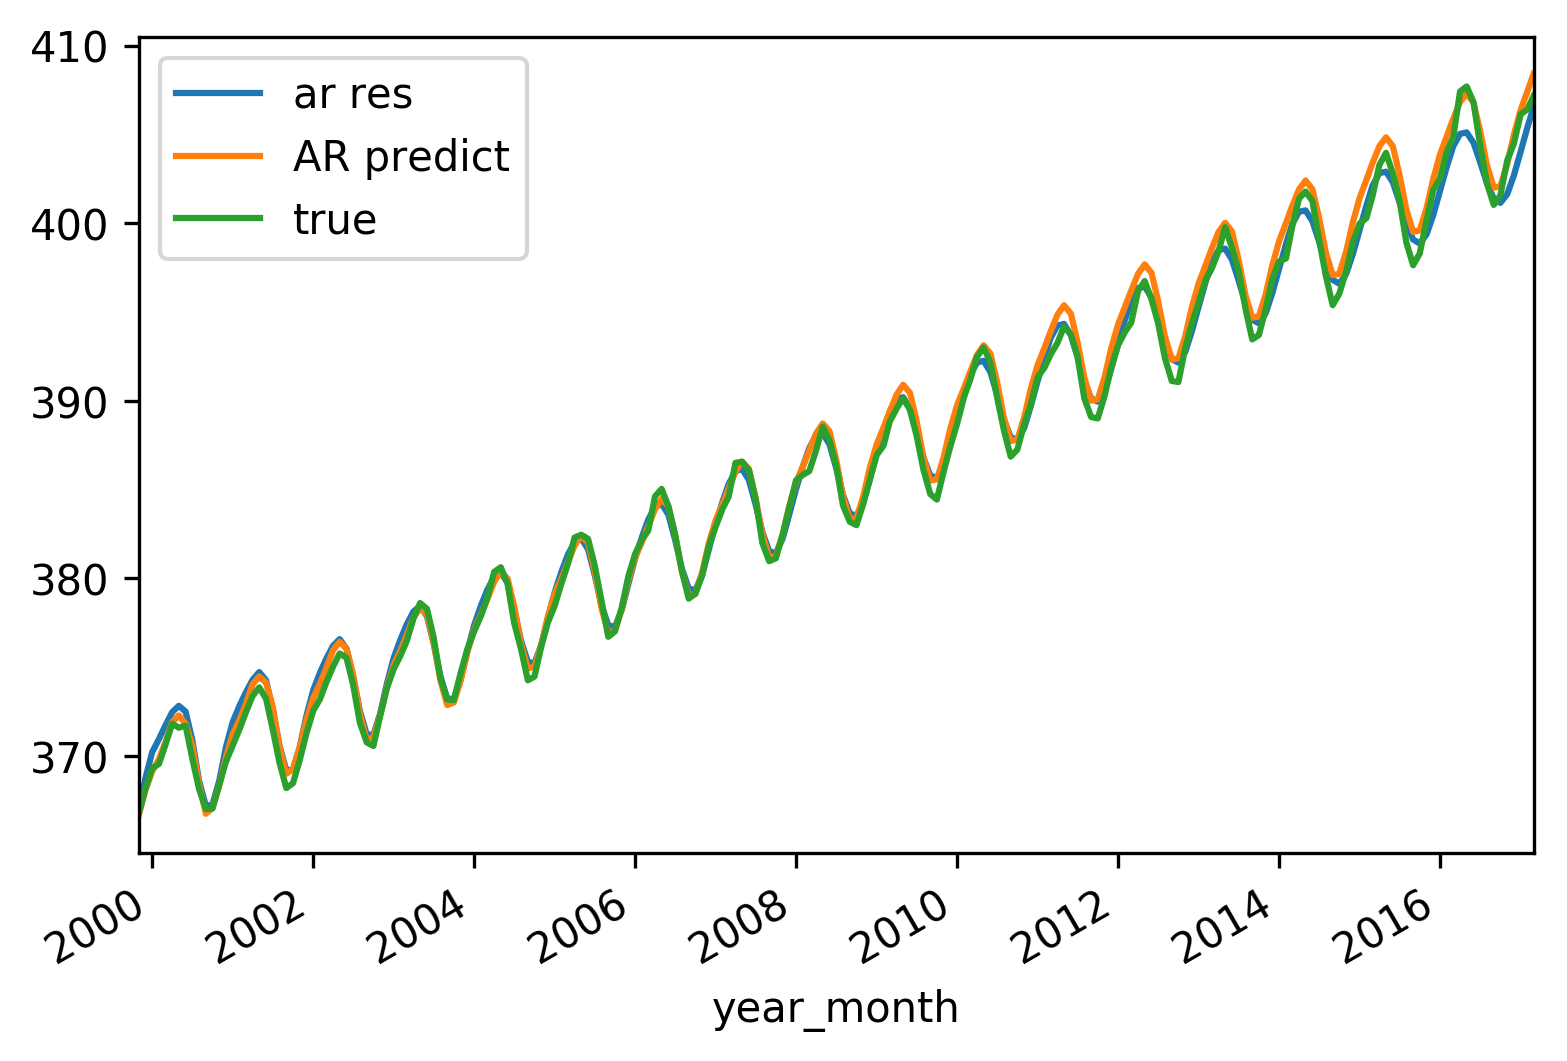

In [352]:
plt.plot(ppm.index[500:], pred_ar_res, label="ar res")
ar_pred.plot(label="AR predict")
ppm[500:].plot(label="true")

plt.legend(loc="best")

In [56]:
X_month = pd.concat([X, pd.DataFrame({'month': X.index.month}, index=X.index)], axis=1)

In [57]:
X_month.head()

year_month  month
year_month                   
1958-03-01      714839      3
1958-04-01      714870      4
1958-05-01      714900      5
1958-06-01      714931      6
1958-07-01      714961      7

In [353]:
X_train_month = X_month[:500]
X_test_month = X_month[500:]
lr_poly_month = make_pipeline(PolynomialFeatures(include_bias=False), LinearRegression())
lr_poly_month.fit(X_train_month, train)
X_test_month.shape

(209, 2)

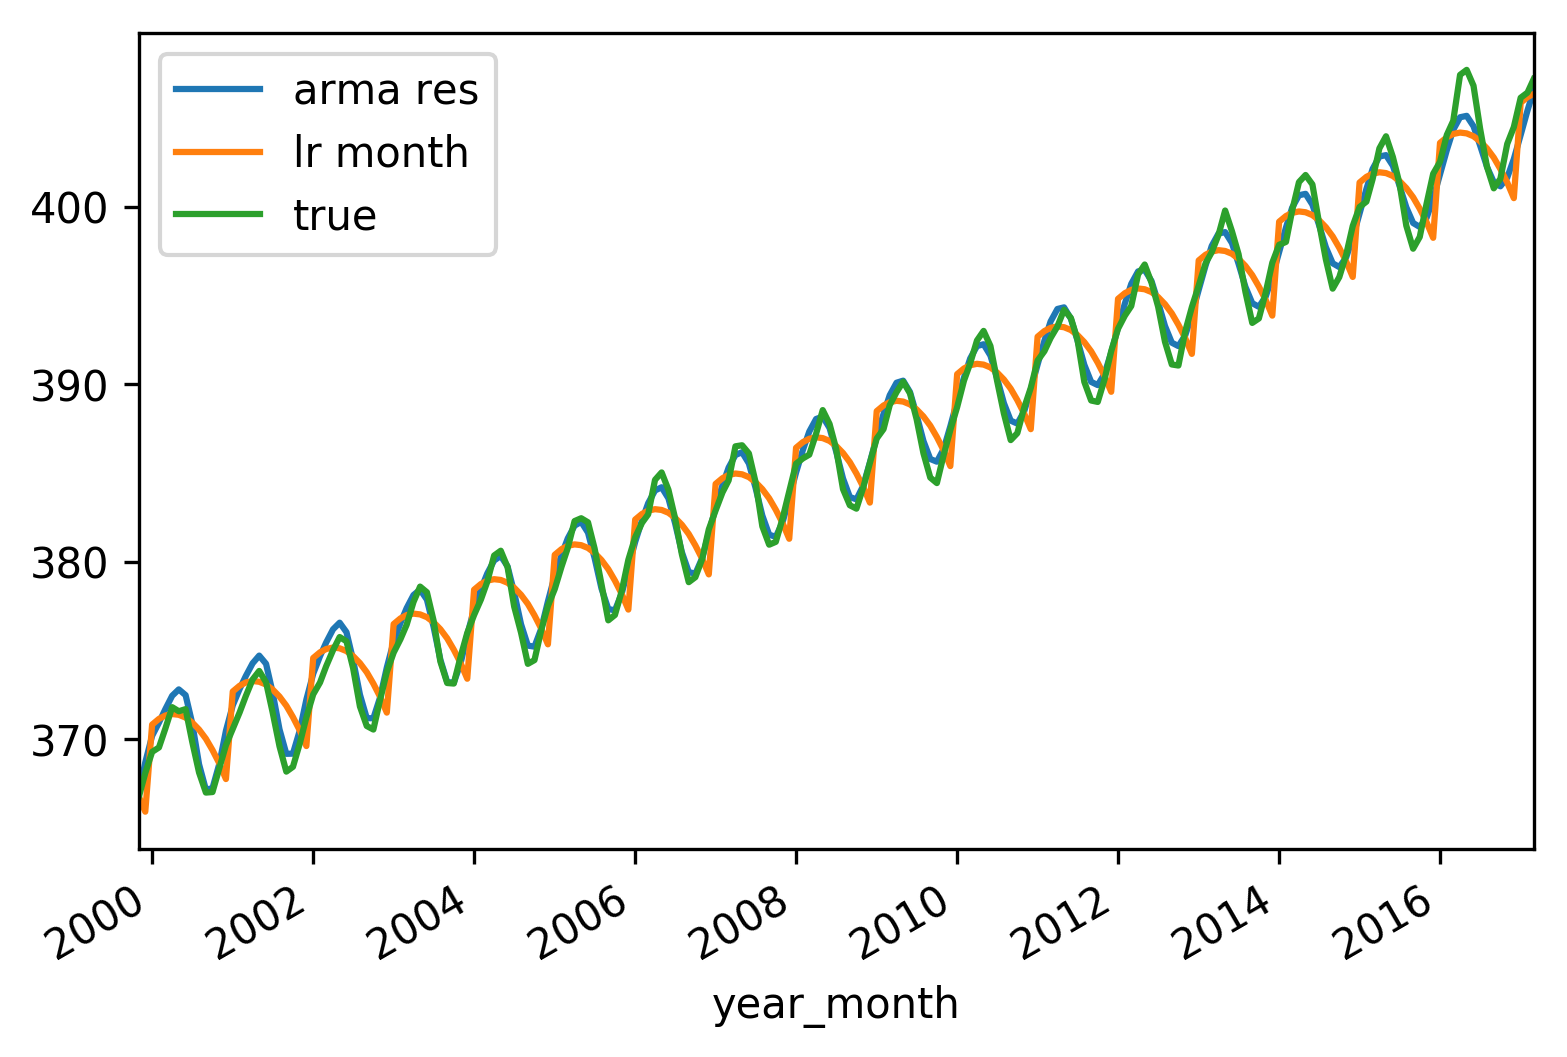

In [60]:
plt.plot(ppm.index[500:], pred_arma_res, label="arma res")
plt.plot(ppm.index[500:], lr_poly_month.predict(X_test_month), label="lr month")

ppm[500:].plot(label="true")
plt.legend(loc="best")

In [354]:
from sklearn.preprocessing import OneHotEncoder
lr_poly_month_ohe = make_pipeline(OneHotEncoder(categorical_features=[1], sparse=False),
                                  PolynomialFeatures(include_bias=False), LinearRegression())
lr_poly_month_ohe.fit(X_train_month, train)

Pipeline(memory=None,
     steps=[('onehotencoder', OneHotEncoder(categorical_features=[1], dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=False)), ('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

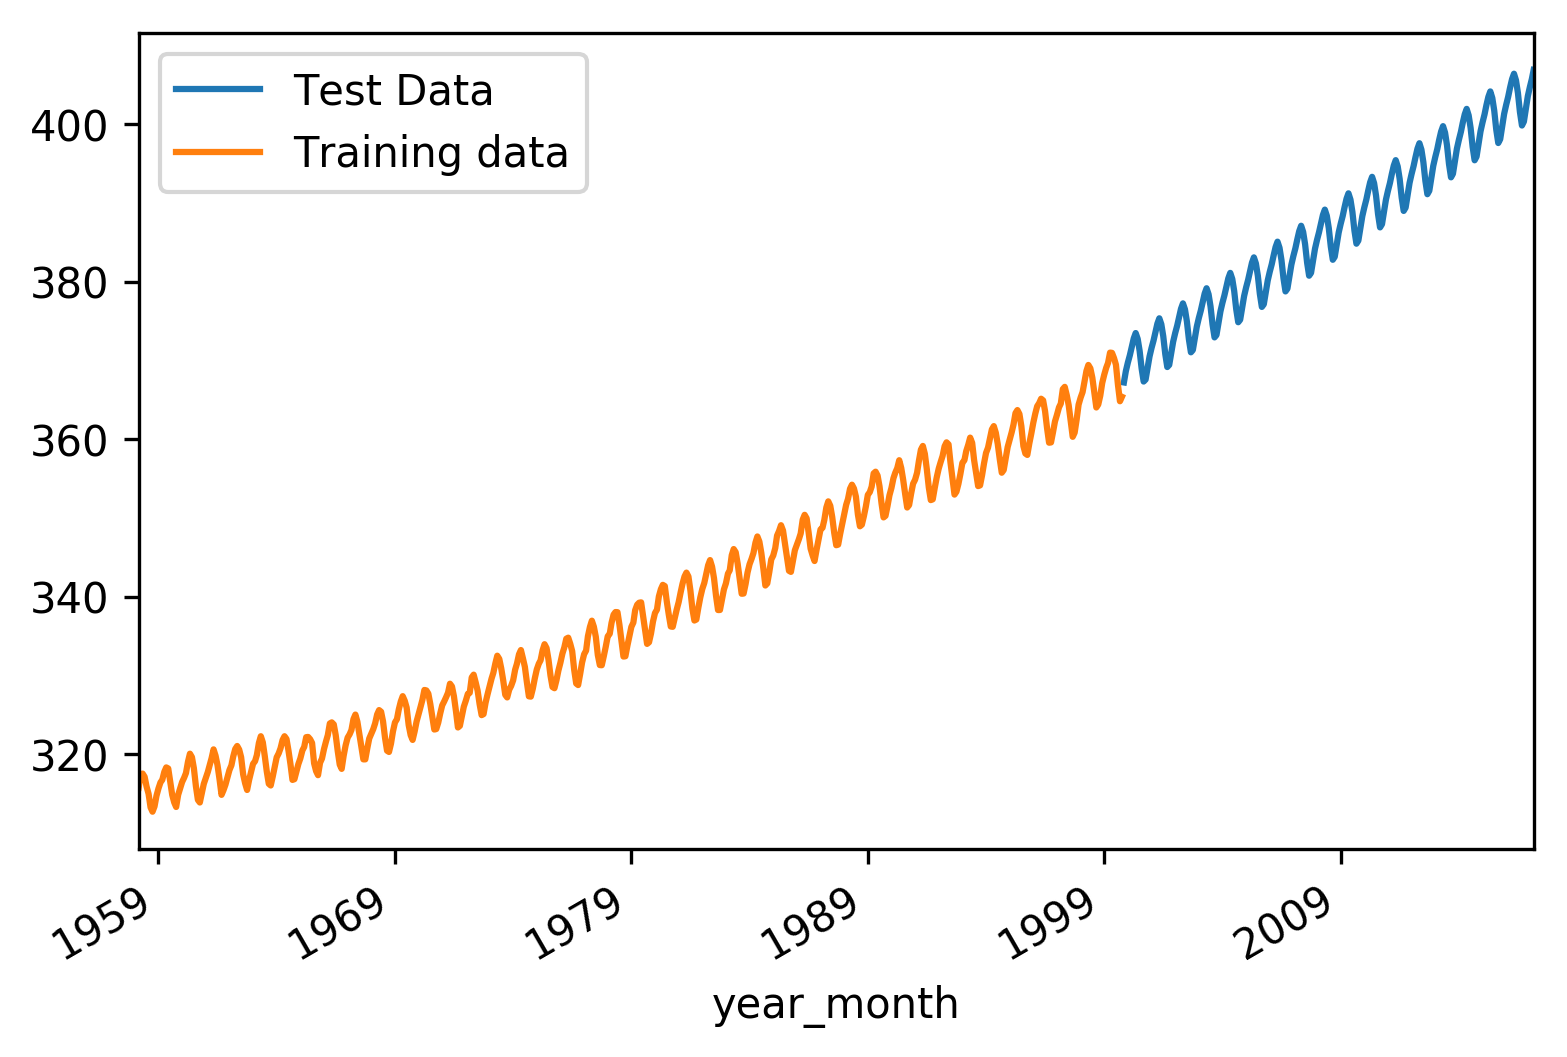

In [84]:
plt.plot(ppm.index[500:], lr_poly_month_ohe.predict(X_test_month), label="lr month")
ppm[:500].plot()
plt.legend(["Test Data", "Training data"])

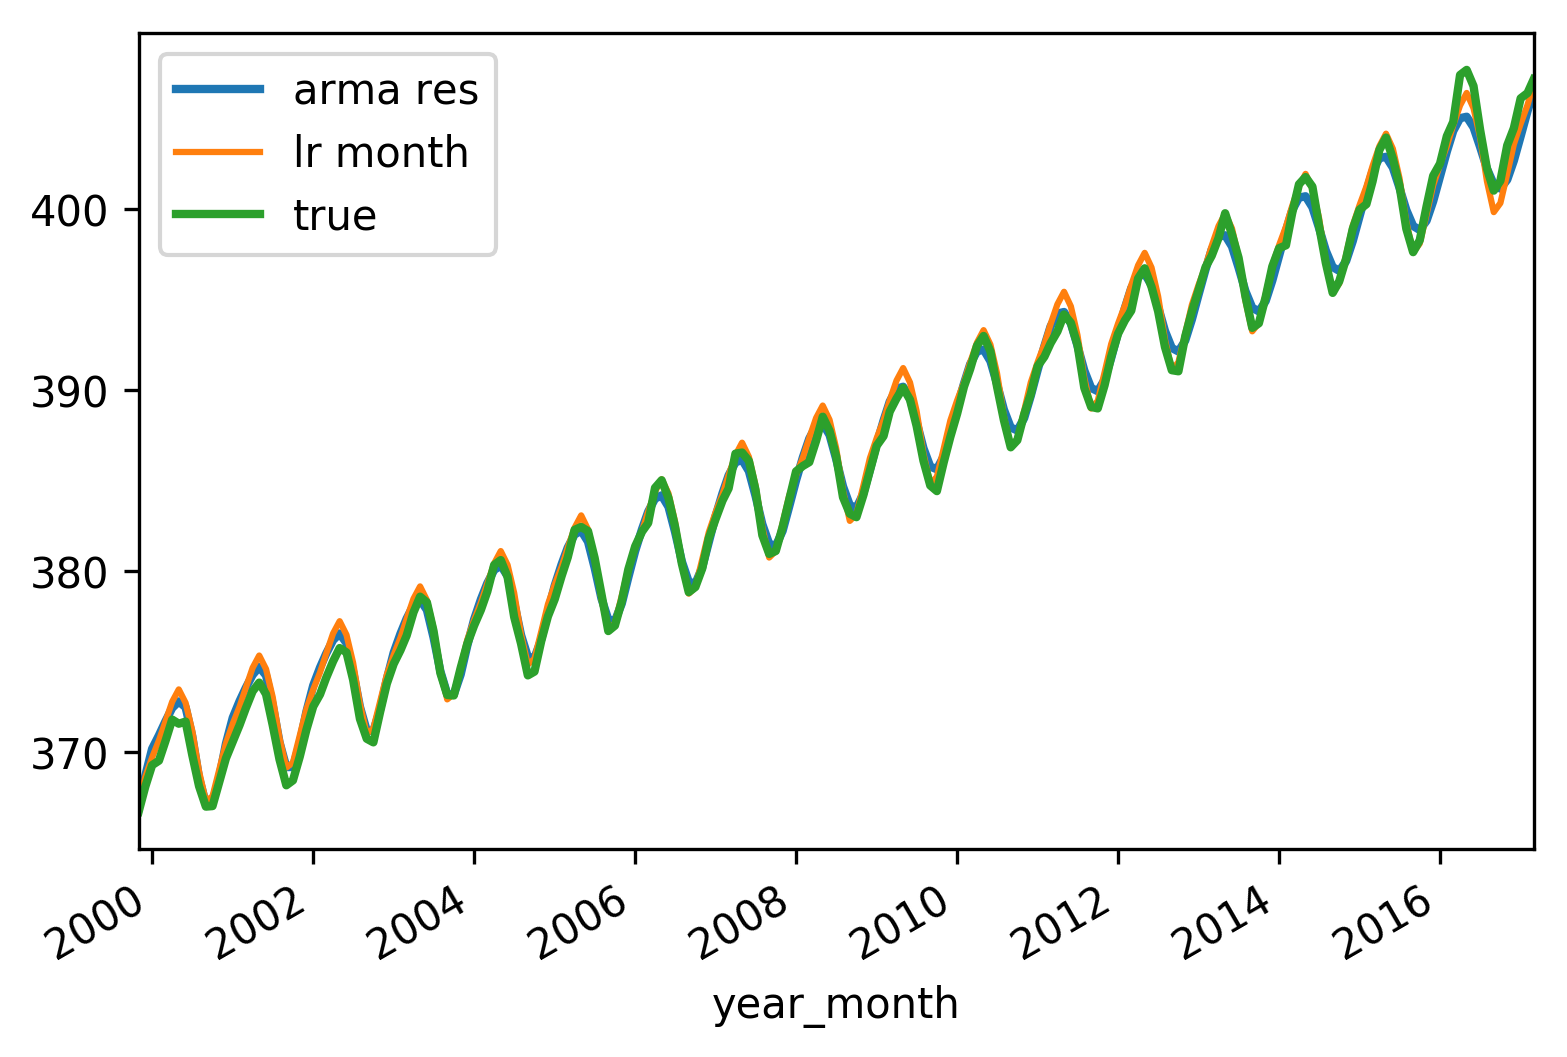

In [66]:
plt.plot(ppm.index[500:], pred_arma_res, label="arma res", linewidth=2)
plt.plot(ppm.index[500:], lr_poly_month_ohe.predict(X_test_month), label="lr month")

ppm[500:].plot(label="true", ax=plt.gca(), linewidth=2)
plt.legend(loc="best")


In [64]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ppm[500:], lr_poly_month_ohe.predict(X_test_month))

0.50487819894708341

In [65]:
mean_squared_error(ppm[500:], pred_arma_res)

0.57735548378852652

# energy data from https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction

In [356]:
energy = pd.read_csv("energydata_complete.csv", parse_dates=['date'], index_col="date")

In [357]:
energy.head()

Appliances  lights     T1       RH_1    T2       RH_2  \
date                                                                         
2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

                        T3       RH_3         T4       RH_4    ...      \
date                                                           ...       
2016-01-11 17:00:00  19.79  44.730000  19.000000  45.566667    ...       
2016-01-11 17:10:00  19.79  44.790000  19.000000  45.992500    ...       
2016-01-11 17:20:00  19.79  44.933333  18.926667  45.890000    ...       
2016-01-11 17:30:00  19.79  45.000000  18.890000  45.723333    ...       
2016-01-11 17:40:00  19.79  45.000000  18.890000  45.530000    ...       

                            T9   RH_9     T_out  Press_mm_hg  RH_out  \
date                                                                   
2016-01-11 17:00:00  17.033333  45.53  6.600000        733.5    92.0   
2016-01-11 17:10:00  17.066667  45.56  6.483333        733.6    92.0   
2016-01-11 17:20:00  17.000000  45.50  6.366667        733.7    92.0   
2016-01-11 17:30:00  17.000000  45.40  6.250000        733.8    92.0   
2016-01-11 17:40:00  17.000000  45.40  6.133333        733.9    92.0   

                     Windspeed  Visibility  Tdewpoint        rv1        rv2  
date                                                                         
2016-01-11 17:00:00   7.000000   63.000000        5.3  13.275433  13.275433  
2016-01-11 17:10:00   6.666667   59.166667        5.2  18.606195  18.606195  
2016-01-11 17:20:00   6.333333   55.333333        5.1  28.642668  28.642668  
2016-01-11 17:30:00   6.000000   51.500000        5.0  45.410389  45.410389  
2016-01-11 17:40:00   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 28 columns]

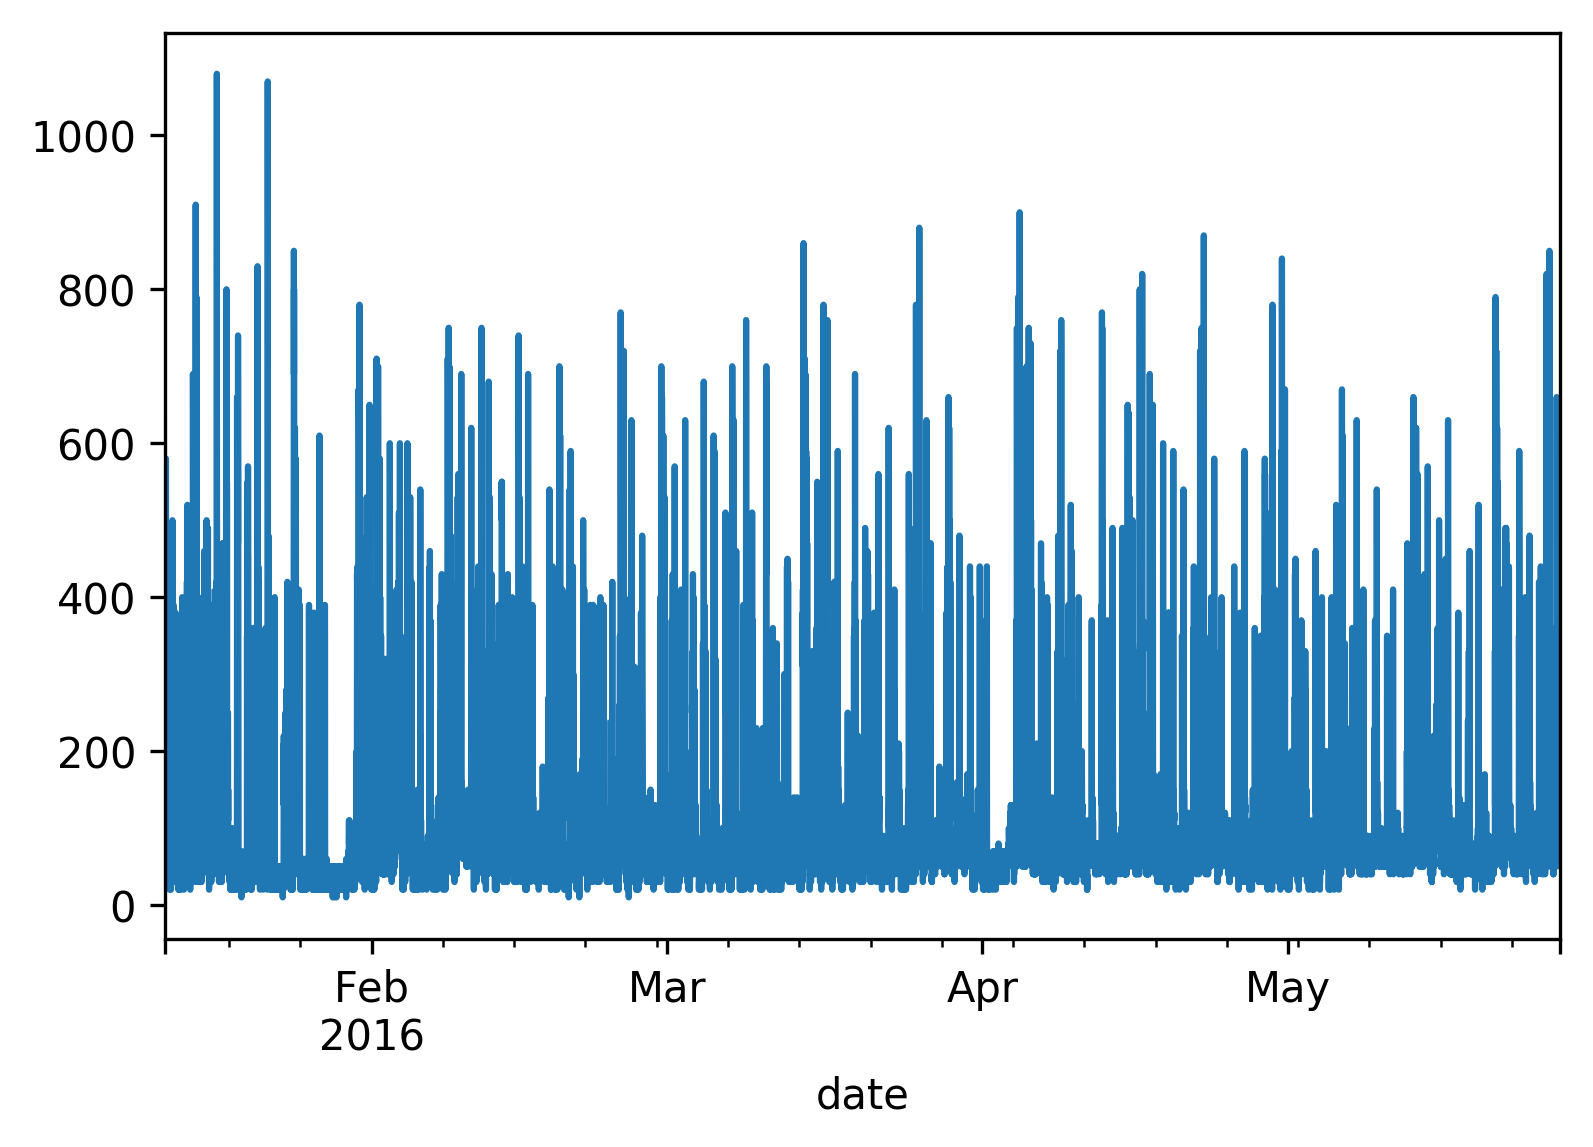

In [358]:
energy.Appliances.plot()

In [359]:
week = energy.Appliances.groupby([energy.index.dayofweek, energy.index.hour]).mean()

In [360]:
week.head(30)

0  0      53.684211
   1      52.719298
   2      50.964912
   3      50.175439
   4      50.438596
   5      54.824561
   6      56.228070
   7      71.403509
   8      94.035088
   9      96.052632
   10    151.842105
   11    178.421053
   12    154.561404
   13    177.982456
   14    151.228070
   15    166.052632
   16    144.736842
   17    190.166667
   18    189.083333
   19    144.833333
   20    148.916667
   21    100.000000
   22     76.166667
   23     63.333333
1  0      66.083333
   1      56.250000
   2      49.083333
   3      47.083333
   4      48.833333
   5      59.833333
Name: Appliances, dtype: float64

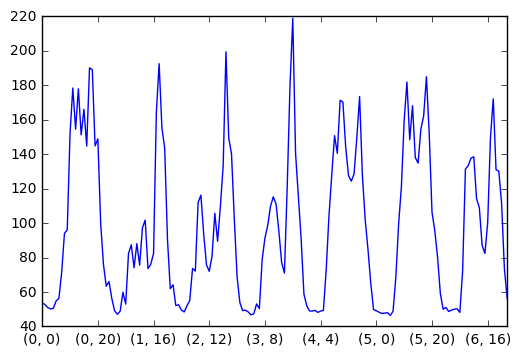

In [449]:
week_sorted.plot()